#  PREDICTING PRICE OF MOBILE PHONES

# 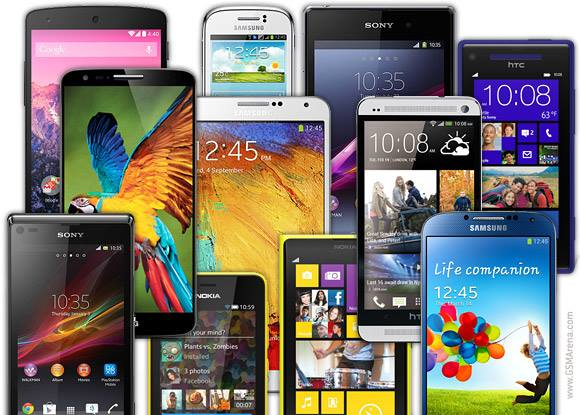

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

Extracting Data

In [2]:
df=pd.read_csv(r"C:\Users\Lenovo\Desktop\PROJECT 4\Processed_Flipdata - Processed_Flipdata.csv")

In [3]:
df.head(5)

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [4]:
df.shape

(541, 12)

Data has 541 rows and 12 columns

# Data Cleaning

Missing Values

In [5]:
df.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

There are no null values to remove

Checking Datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


In [7]:
#DROPPING THE COLUMN UNNAMED AS IT IS OF NO USE

df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [8]:
# Check unique values in the 'Prize' column

df['Prize'].unique()

array(['7,299', '11,999', '5,649', '8,999', '7,999', '9,499', '10,699',
       '6,999', '15,999', '13,999', '12,999', '6,199', '6,599', '7,749',
       '9,699', '9,999', '10,999', '20,999', '15,499', '18,999', '12,499',
       '10,499', '14,490', '16,999', '6,499', '5,999', '6,299', '16,499',
       '14,499', '13,490', '19,999', '1,449', '1,849', '1,422', '29,999',
       '1,299', '17,999', '11,499', '2,615', '28,999', '23,999', '14,999',
       '2,490', '7,961', '2,499', '11,248', '6,799', '13,499', '8,749',
       '8,049', '1,375', '1,599', '7,499', '7,245', '26,999', '21,999',
       '17,499', '21,499', '7,115', '49,999', '32,999', '8,499', '25,999',
       '4,999', '3,549', '1,699', '920', '11,970', '1,199', '12,990',
       '6,978', '7,370', '44,999', '8,995', '24,999', '11,249', '34,999',
       '21,174', '43,999', '7,993', '8,069', '30,499', '30,999', '9,290',
       '8,449', '8,495', '29,499', '20,998', '19,280', '8,649', '19,499',
       '9,349', '8,288', '12,272', '6,794', '2

In [9]:
# Clean 'Prize' column: remove non-numeric characters and convert to numeric
df['Prize'] = df['Prize'].str.replace(',', '').astype(int)

In [10]:
df['Prize'].dtypes

dtype('int32')

In [11]:
df['Prize'].unique()

array([ 7299, 11999,  5649,  8999,  7999,  9499, 10699,  6999, 15999,
       13999, 12999,  6199,  6599,  7749,  9699,  9999, 10999, 20999,
       15499, 18999, 12499, 10499, 14490, 16999,  6499,  5999,  6299,
       16499, 14499, 13490, 19999,  1449,  1849,  1422, 29999,  1299,
       17999, 11499,  2615, 28999, 23999, 14999,  2490,  7961,  2499,
       11248,  6799, 13499,  8749,  8049,  1375,  1599,  7499,  7245,
       26999, 21999, 17499, 21499,  7115, 49999, 32999,  8499, 25999,
        4999,  3549,  1699,   920, 11970,  1199, 12990,  6978,  7370,
       44999,  8995, 24999, 11249, 34999, 21174, 43999,  7993,  8069,
       30499, 30999,  9290,  8449,  8495, 29499, 20998, 19280,  8649,
       19499,  9349,  8288, 12272,  6794, 27540, 27877,  5990, 11980,
       11349,  9790, 28298, 22999,  7049,  6960,  9104, 36999, 30385,
       19990, 12900,  8990, 10943, 55999, 13489, 11209, 16988, 12989,
        7190,  7990, 27999, 19397, 10989, 16990, 29990, 38920,  9387,
       29790,  5799,

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Memory,541.0,110.550832,60.600694,16.0,64.00,128.00,128.00,256.00
RAM,541.0,5.397412,1.984923,2.0,4.00,6.00,8.00,8.00
Battery_,541.0,4871.587800,780.148862,800.0,5000.00,5000.00,5000.00,7000.00
AI Lens,541.0,0.062847,0.242911,0.0,0.00,0.00,0.00,1.00
Mobile Height,541.0,16.431201,2.523553,4.5,16.51,16.71,16.94,41.94
Prize,541.0,16228.375231,10793.588322,920.0,9290.00,13499.00,19280.00,80999.00


In [13]:
df['Model'].unique()

array(['Infinix SMART 7', 'MOTOROLA G32', 'POCO C50', 'Infinix HOT 30i',
       'REDMI 10', 'SAMSUNG Galaxy F13', 'SAMSUNG Galaxy F04', 'POCO C51',
       'MOTOROLA e13', 'vivo T2x 5G', 'Infinix Smart 7 HD', 'REDMI A1+',
       'POCO C55', 'MOTOROLA g13', 'POCO M4 5G', 'MOTOROLA e32',
       'vivo T2 5G', 'MOTOROLA G62 5G', 'POCO M5', 'realme C33 2023',
       'SAMSUNG Galaxy F14 5G', 'MOTOROLA g73 5G', 'realme C30',
       'POCO X5 5G', 'POCO M4 Pro', 'REDMI 11 Prime', 'realme C55',
       'realme 10 Pro 5G', 'Micromax IN 2C', 'POCO M4 Pro 5G',
       'realme Narzo 30 Pro 5G', 'micromax 2', 'Infinix Note 12 Pro 5G',
       'SAMSUNG Galaxy F23 5G', 'micromax', 'MOTOROLA Edge 40',
       'micromax 1', 'realme Narzo 30', 'Infinix NOTE 12i', 'realme 10',
       'realme 8i', 'Micromax 3', 'Google Pixel 6a', 'Infinix HOT 20 5G',
       'realme GT 2', 'REDMI Note 12', 'REDMI Note 12 5G', 'micromax 3',
       'SAMSUNG Galaxy M04', 'REDMI K50i 5G', 'MOTOROLA e40',
       'REDMI 9 Activ', 'MOTO

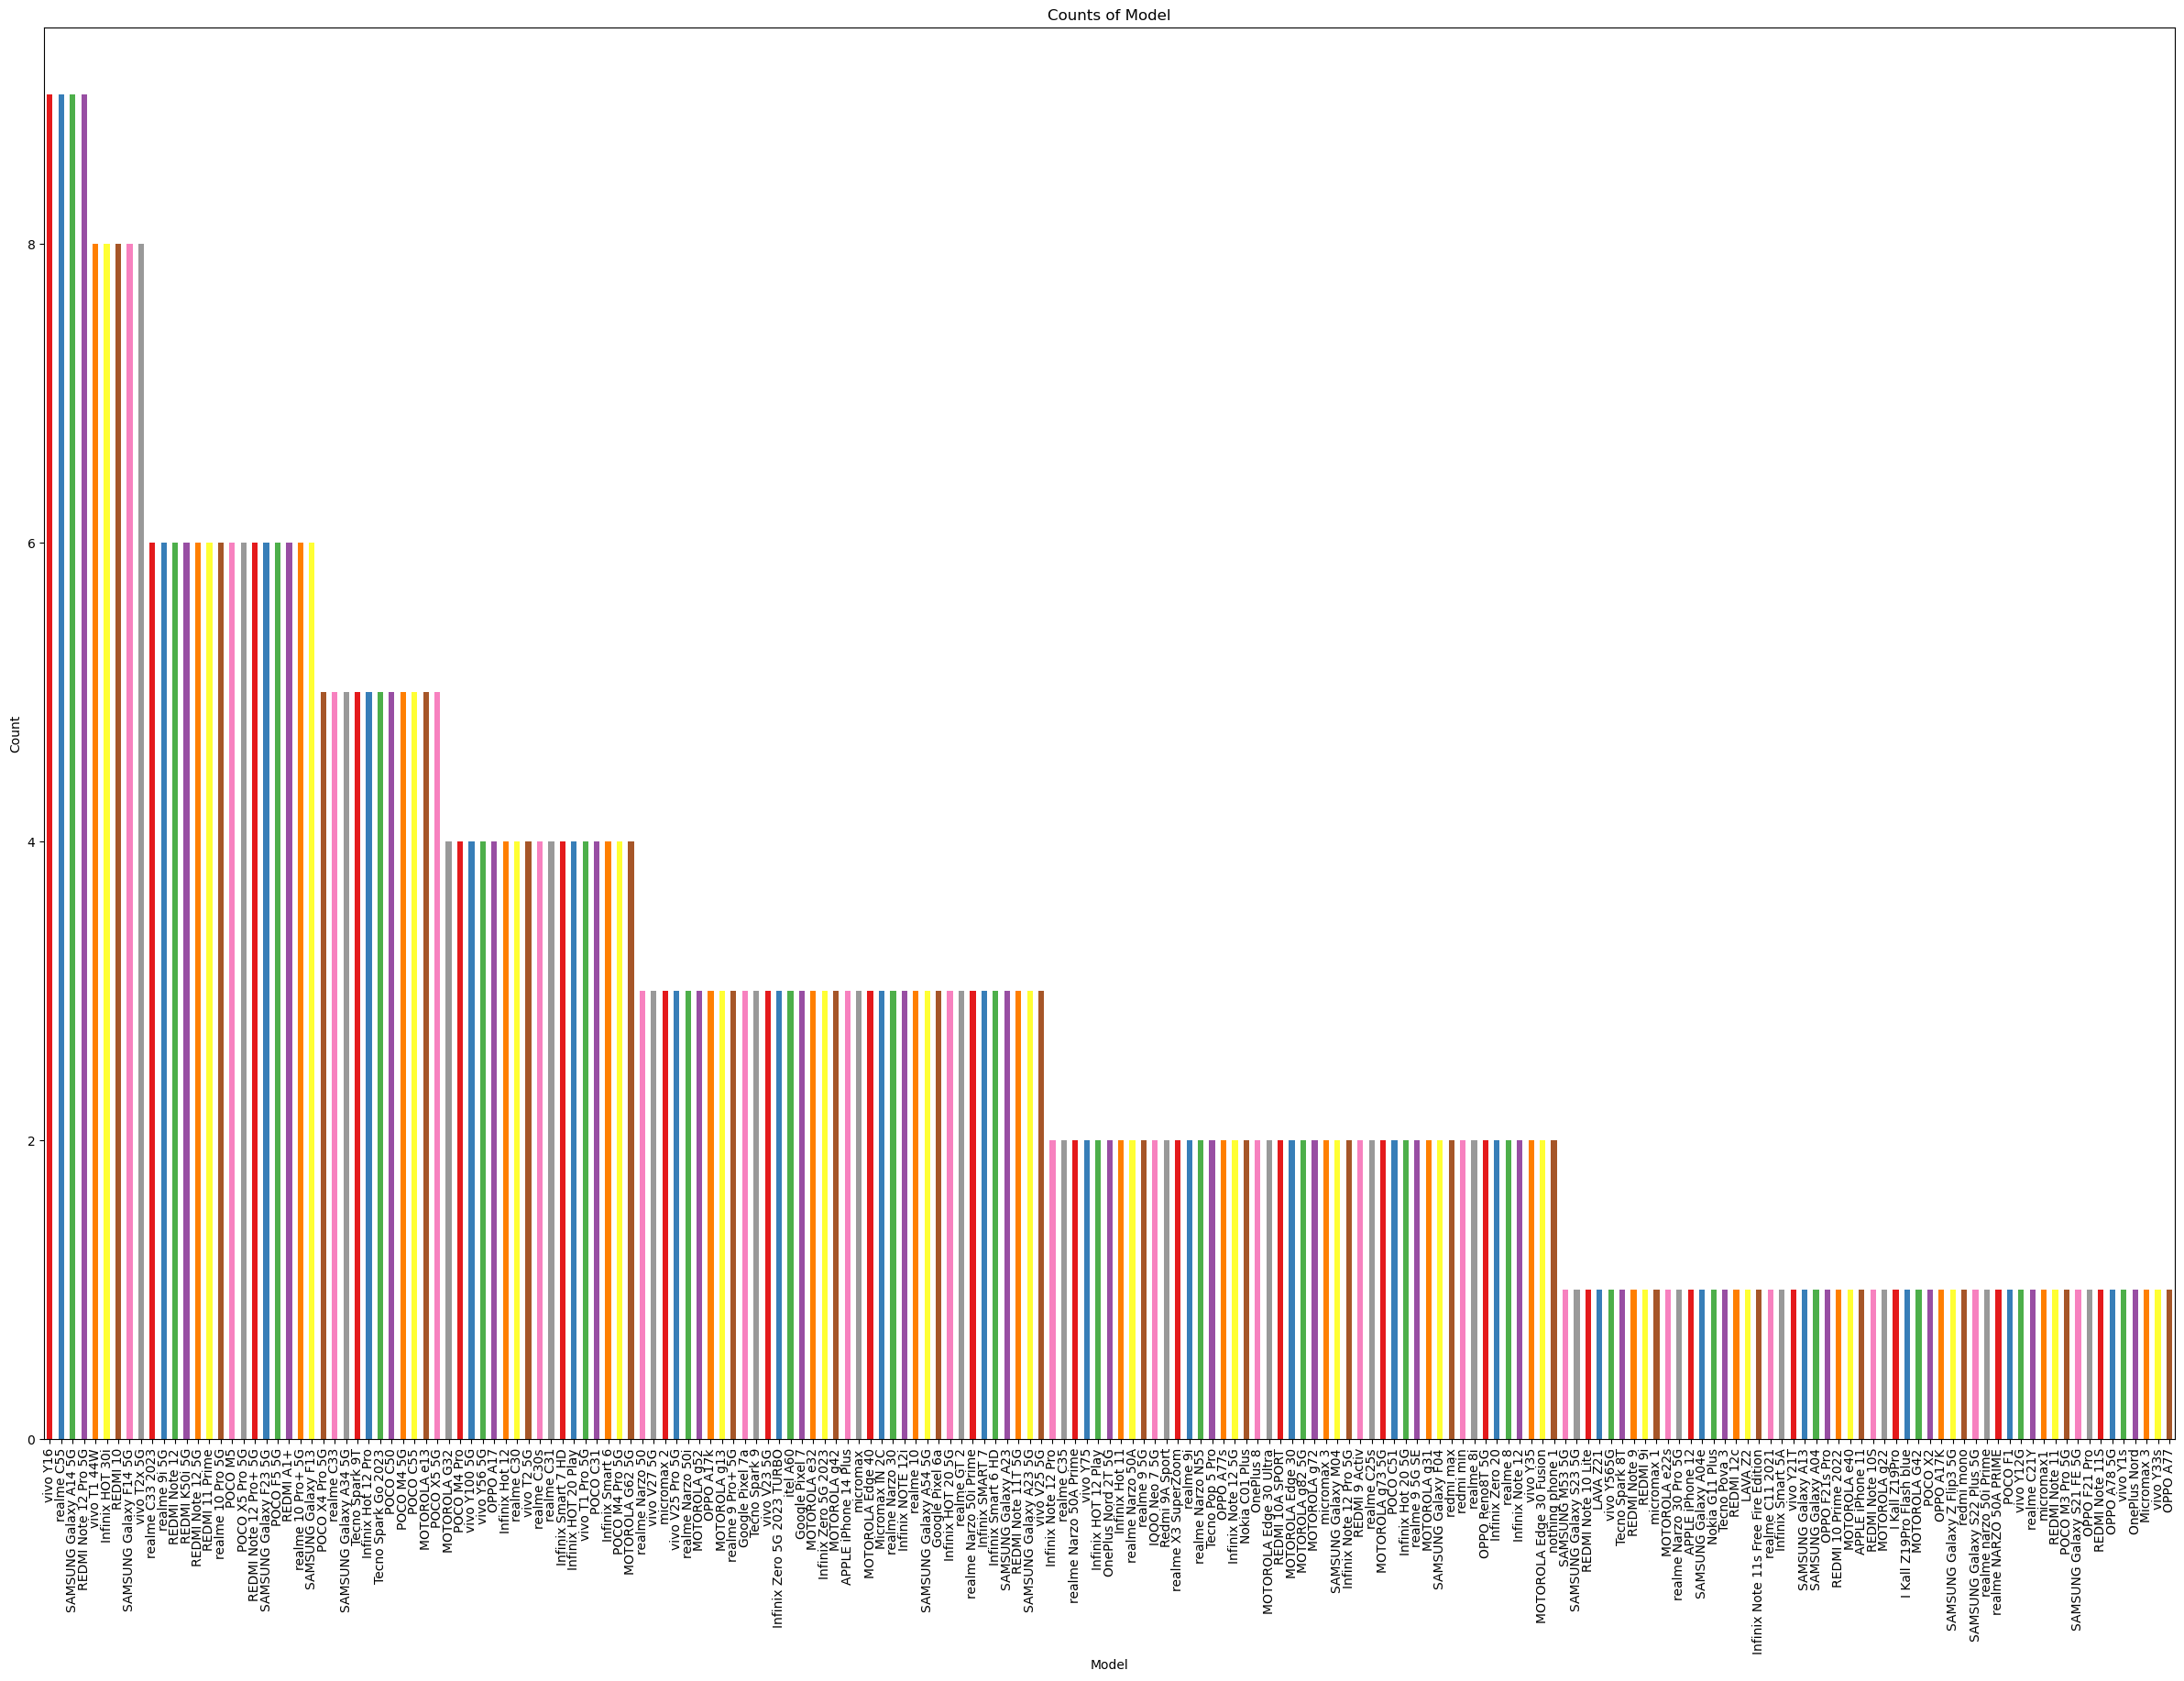

In [14]:
plt.figure(figsize=(30 ,20))
colors = sns.color_palette("Set1", len(df['Model'].unique()))

# Plot the bar chart with the custom color palette
df['Model'].value_counts().plot(kind='bar', color=colors)

plt.title('Counts of Model')
plt.xlabel('Model')
plt.ylabel('Count')
plt.show()

In [15]:
df['Colour'].unique()

array(['Night Black', 'Azure Blue', 'Mineral Gray', 'Royal Blue',
       'Marigold', 'Glacier Blue', 'Mirror Black', 'Diamond White',
       'Shadow Black', 'Emerald Green', 'Waterfall Blue', 'Opal Green',
       'Power Black', 'Country Green', 'Cosmic Black', 'Aurora Gold',
       'Marine Blue', 'Glimmer Black', 'Green Apple', 'Black',
       'Light Blue', 'Light Green', 'Cool Blue', 'Forest Green',
       'Nightsky Green', 'Matte Charcoal', 'Eco Black', 'Caribbean Green',
       'Jade Purple', 'Satin Silver', 'Sunrise Orange', 'Sunrise Copper',
       'Arctic Blue', 'Lavender Blue', 'Velocity Wave', 'Nitro Blaze',
       'Frosted Blue', 'Yellow', 'Midnight Gray', 'Creamy White',
       'Sandy Gold', 'Aqua Blue', 'GOAT Green', 'Midnight Blue',
       'Night Sea', 'Bamboo Green', 'Lake Blue', 'Denim Black',
       'Wildcat Blue', 'Icy Blue', 'Flashy Black', 'Sunshower',
       'Rainy Night', 'Rainforest', 'B.A.E. Purple', 'Peppy Purple',
       'Lucent White', 'Dark Matter', 'Nebula Bl

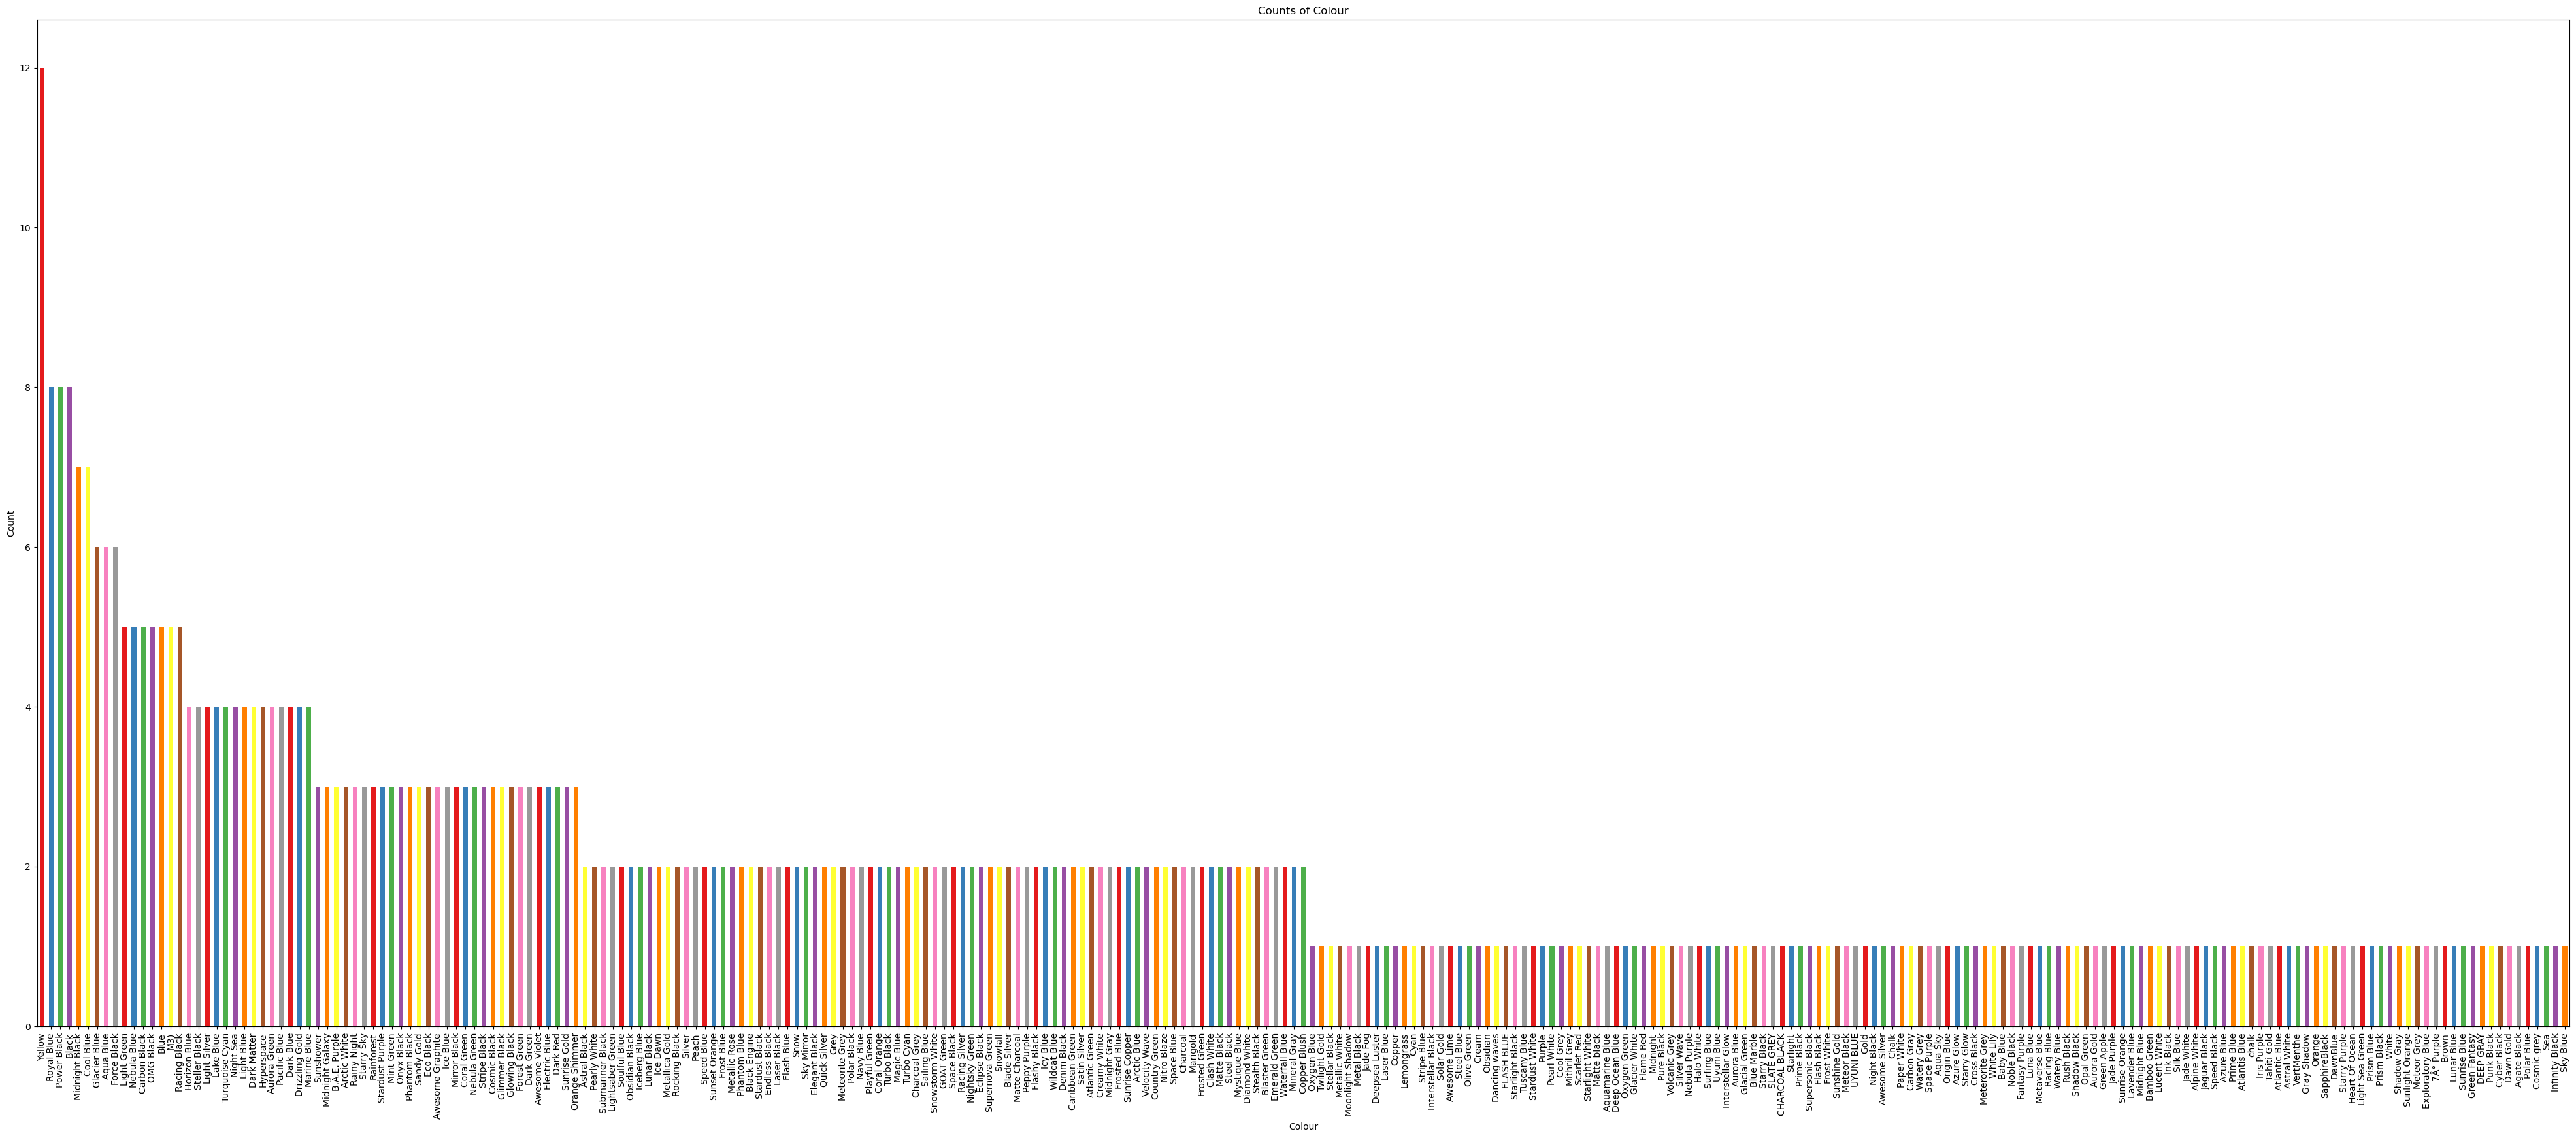

In [16]:
plt.figure(figsize=(50 ,20))
colors = sns.color_palette("Set1", len(df['Colour'].unique()))

# Plot the bar chart with the custom color palette
df['Colour'].value_counts().plot(kind='bar', color=colors)

plt.title('Counts of Colour')
plt.xlabel('Colour')
plt.ylabel('Count')
plt.show()

In [17]:
df['Memory'].unique()

array([ 64, 128,  32, 256,  16], dtype=int64)

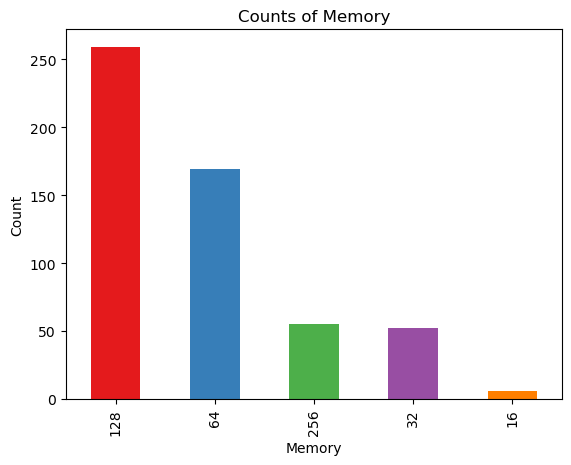

In [18]:
colors = sns.color_palette("Set1", len(df['Memory'].unique()))

# Plot the bar chart with the custom color palette
df['Memory'].value_counts().plot(kind='bar', color=colors)

plt.title('Counts of Memory')
plt.xlabel('Memory')
plt.ylabel('Count')
plt.show()

In [19]:
df['RAM'].unique()

array([4, 8, 2, 6, 3], dtype=int64)

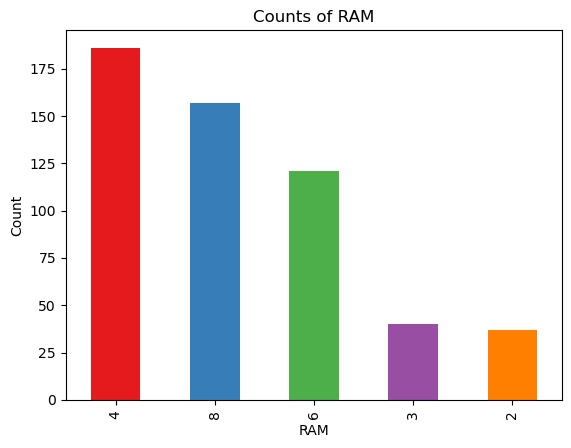

In [20]:
colors = sns.color_palette("Set1", len(df['RAM'].unique()))

# Plot the bar chart with the custom color palette
df['RAM'].value_counts().plot(kind='bar', color=colors)

plt.title('Counts of RAM')
plt.xlabel('RAM')
plt.ylabel('Count')
plt.show()

In [21]:
df['Battery_'].unique()

array([6000, 5000, 4500,  800, 1900, 1000, 4400, 1020, 4410, 5080, 2550,
       4980, 4600, 1200, 1500, 3300, 4020, 4300, 4800, 4200, 4610, 4050,
       4270, 4000, 4030, 4115, 3000, 3110, 4700, 5020, 4323, 4830, 5200,
       7000, 2815, 3900, 3100], dtype=int64)

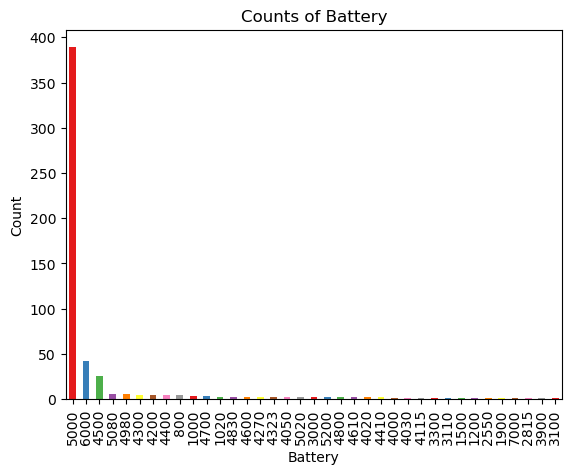

In [22]:
colors = sns.color_palette("Set1", len(df['Battery_'].unique()))

# Plot the bar chart with the custom color palette
df['Battery_'].value_counts().plot(kind='bar', color=colors)

plt.title('Counts of Battery')
plt.xlabel('Battery')
plt.ylabel('Count')
plt.show()

In [23]:
df['AI Lens'].unique()

array([1, 0], dtype=int64)

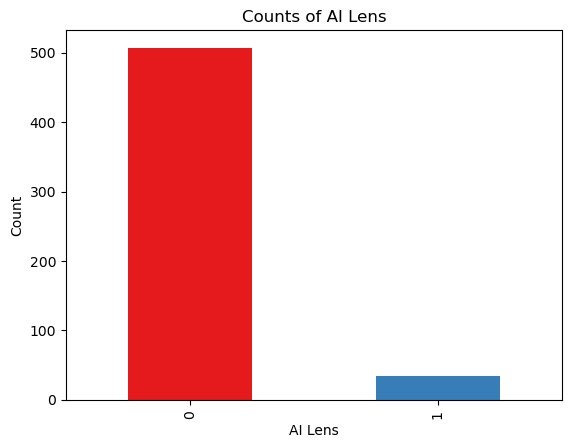

In [24]:
colors = sns.color_palette("Set1", len(df['AI Lens'].unique()))

# Plot the bar chart with the custom color palette
df['AI Lens'].value_counts().plot(kind='bar', color=colors)

plt.title('Counts of AI Lens')
plt.xlabel('AI Lens')
plt.ylabel('Count')
plt.show()

In [25]:
df['Front Camera'].unique()

array(['5MP', '16MP', '8MP', '13MP', '0MP', '32MP', '10MP', '50MP',
       '60MP', '20MP', '44MP', '2MP', '12MP'], dtype=object)

In [26]:
df['Rear Camera'].unique()

array(['13MP', '50MP', '8MP', '40MP', '32MP', '48MP', '64MP', '108MP',
       '0MP', '2MP', '12MP', '200MP', '5MP', '16MP'], dtype=object)

In [27]:
df['Front Camera'] = df['Front Camera']+df['Rear Camera']

In [28]:
df.rename(columns={'Front Camera':'Dual Camera'},inplace=True)

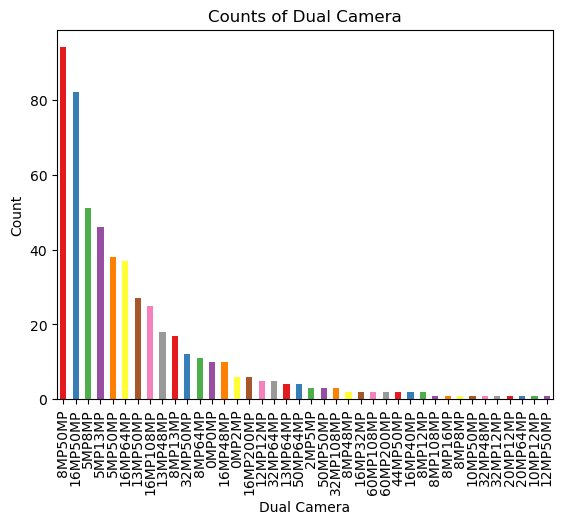

In [29]:
colors = sns.color_palette("Set1", len(df['Dual Camera'].unique()))

# Plot the bar chart with the custom color palette
df['Dual Camera'].value_counts().plot(kind='bar', color=colors)

plt.title('Counts of Dual Camera')
plt.xlabel('Dual Camera')
plt.ylabel('Count')
plt.show()

In [30]:
df.drop(["Rear Camera"], axis=1, inplace=True)

In [31]:
df['Mobile Height'].unique()

array([16.76, 16.64, 16.56, 17.02, 16.51, 16.71, 17.04, 16.21, 16.94,
       16.33, 41.94, 17.07,  4.5 ,  7.11, 16.26,  6.1 , 15.6 , 16.81,
        5.08, 16.59, 16.43, 16.66, 17.22, 16.36, 17.32, 15.46,  4.57,
       16.54, 15.49, 16.  , 15.7 , 16.69, 15.8 , 13.84, 17.53, 16.55,
       17.65, 12.7 ])

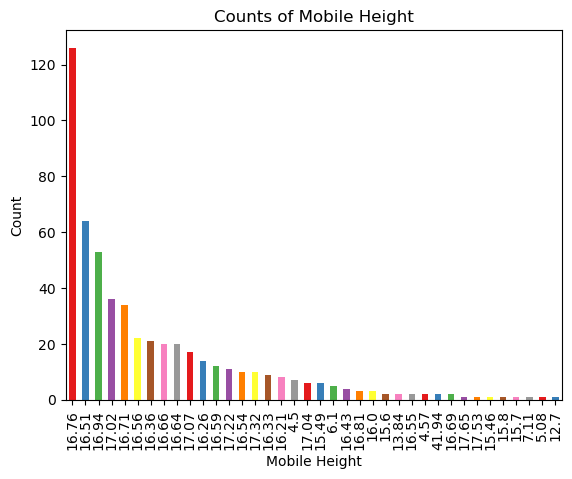

In [32]:
colors = sns.color_palette("Set1", len(df['Mobile Height'].unique()))

# Plot the bar chart with the custom color palette
df['Mobile Height'].value_counts().plot(kind='bar', color=colors)

plt.title('Counts of Mobile Height')
plt.xlabel('Mobile Height')
plt.ylabel('Count')
plt.show()

In [33]:
df['Processor_'].unique()

array(['Unisoc Spreadtrum SC9863A1', 'Qualcomm Snapdragon 680',
       'Mediatek Helio A22', 'G37', 'Exynos 850', 'Mediatek Helio P35',
       'Helio G36', 'Unisoc T606', 'Dimensity 6020',
       'Spreadtrum SC9863A1', 'Mediatek Helio G85', 'Helio G85',
       'Mediatek Dimensity 700', 'Mediatek Helio G37', 'Snapdragon 695',
       'Qualcomm Snapdragon 695 5G', 'Mediatek Helio G99', 'Unisoc T612',
       'Exynos 1330, Octa Core ', 'Mediatek Dimensity 930',
       'Qualcomm Snapdragon 695', 'Mediatek Helio G96', 'Helio G99',
       'Helio G88', 'SC6531E', 'Mediatek Dimensity 810',
       'MediaTek Dimensity 800U', 'Mediatek Dimensity 810 5G',
       'Qualcomm Snapdragon 750G', 'Dimensity 8020', 'MediaTek Helio G95',
       'Mediatek Helio G99 Octa Core', 'MediaTek Helio G96', 'MediaTek',
       'Google Tensor', 'Dimensity 810', 'Qualcomm Snapdragon 888',
       'Snapdragon 685', 'Qualcomm Snapdragon 4 Gen 1', '0 0 0 208MHz',
       'MediaTek Helio P35', 'Dimensity 8100', 'UNISOC T700',


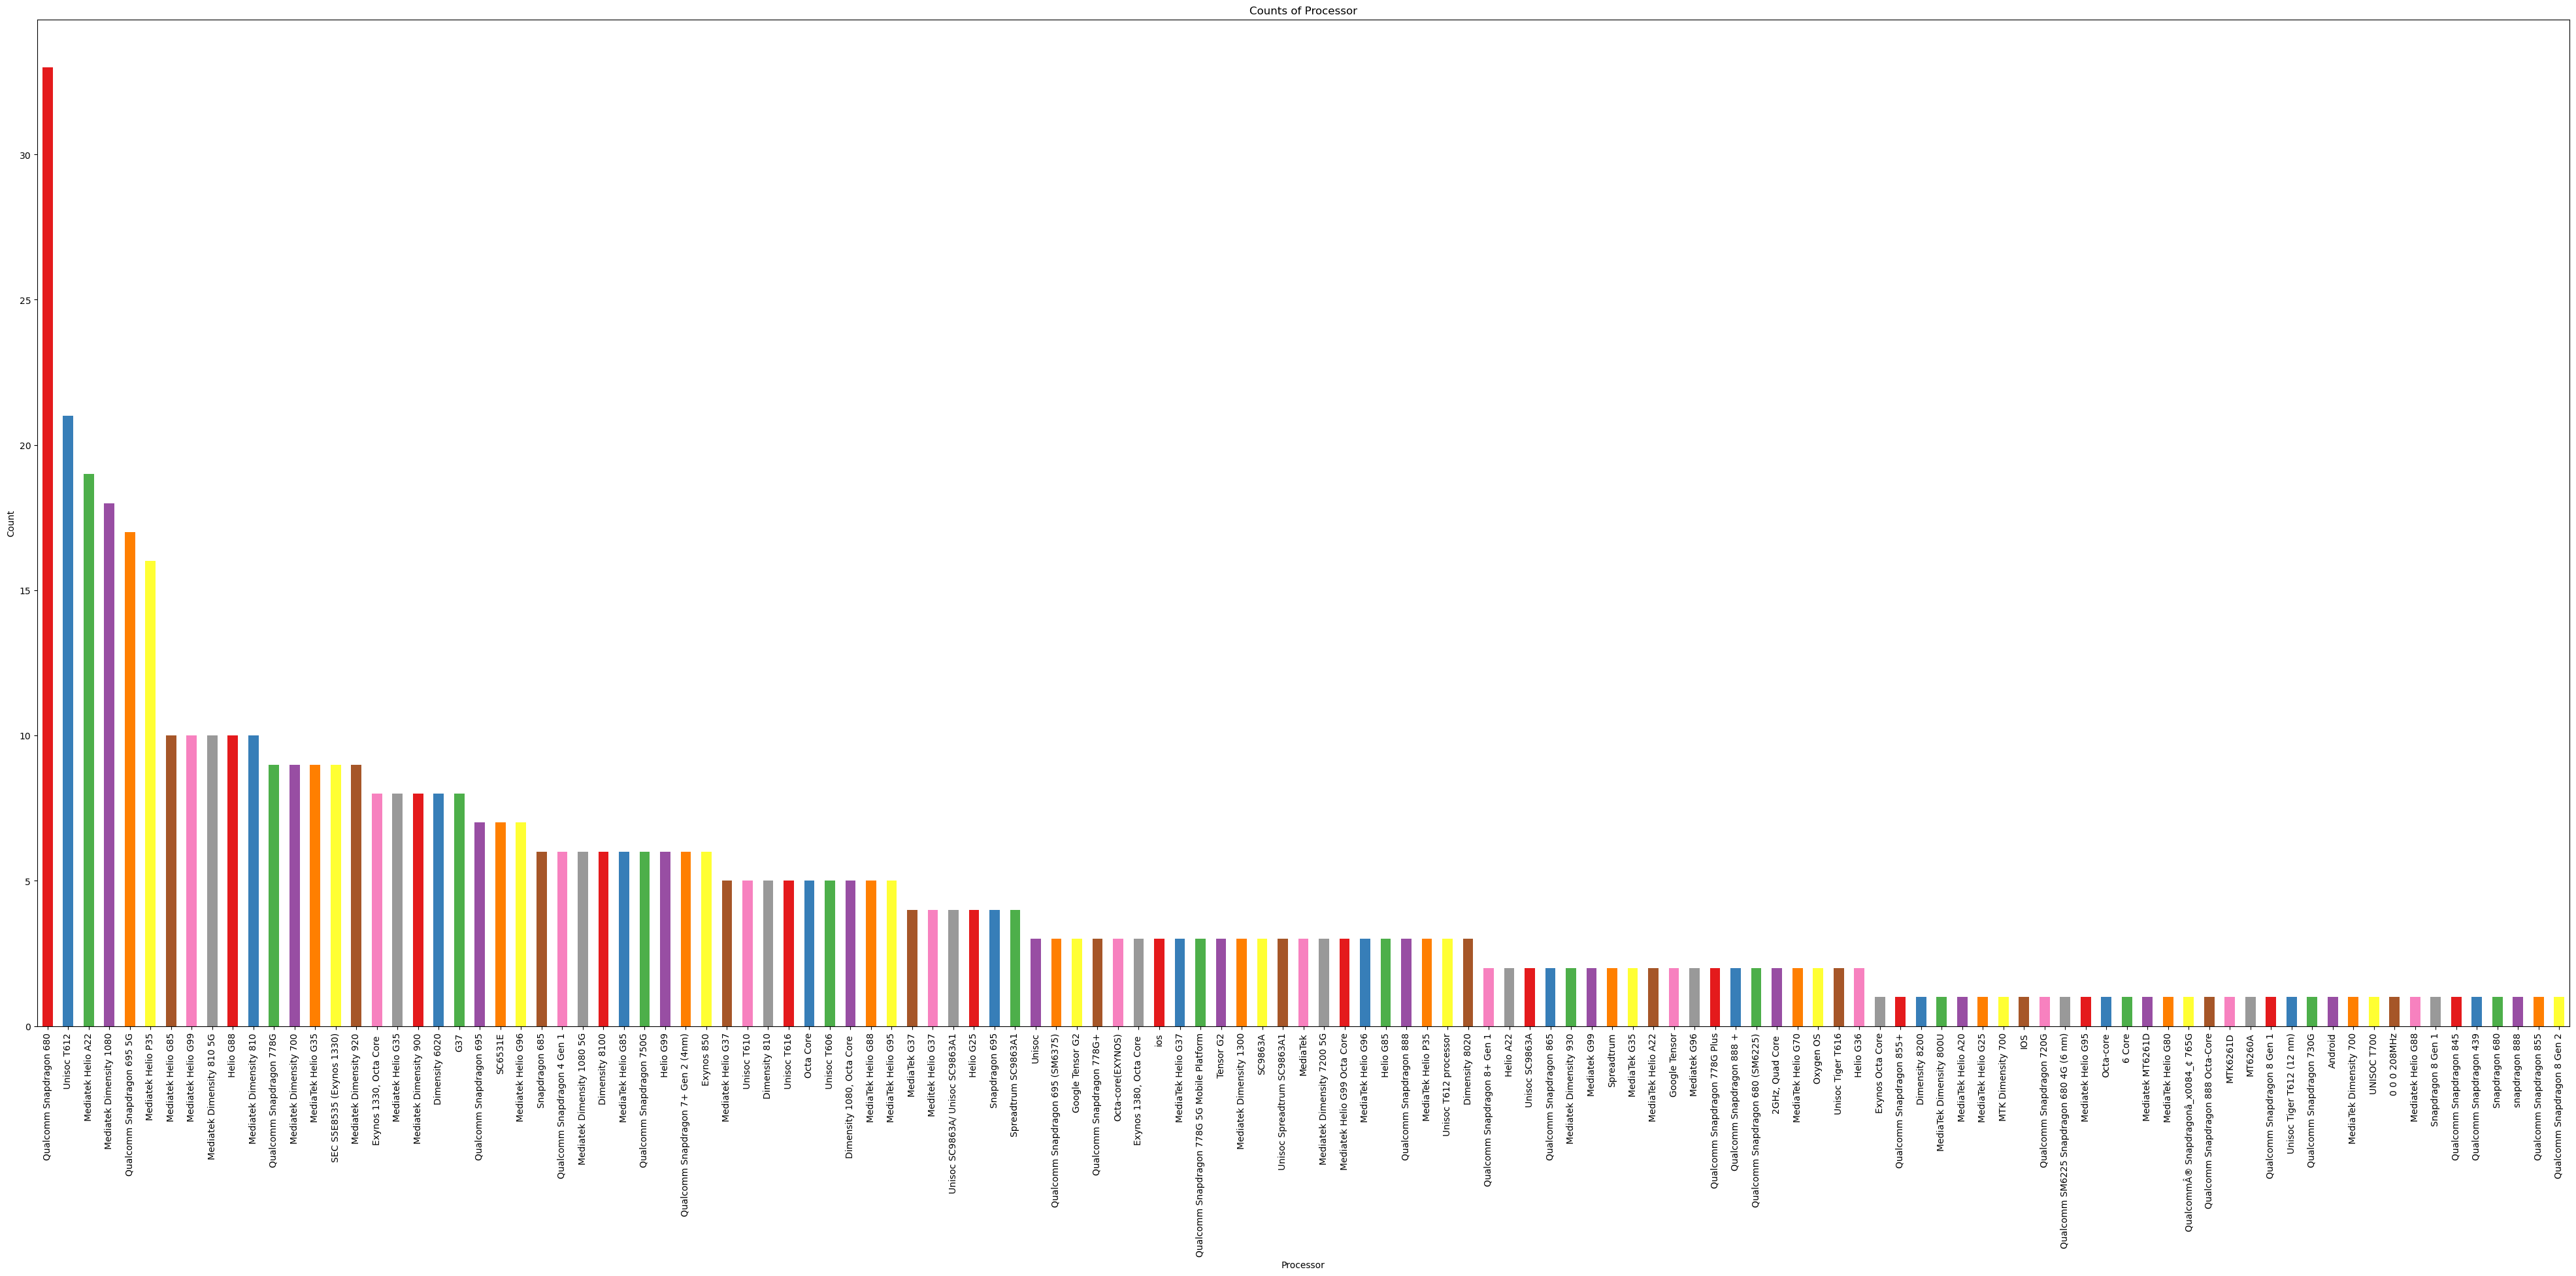

In [34]:
plt.figure(figsize=(50 ,20))
colors = sns.color_palette("Set1", len(df['Processor_'].unique()))

# Plot the bar chart with the custom color palette
df['Processor_'].value_counts().plot(kind='bar', color=colors)

plt.title('Counts of Processor')
plt.xlabel('Processor')
plt.ylabel('Count')
plt.show()

In [35]:
df['Prize'].unique()

array([ 7299, 11999,  5649,  8999,  7999,  9499, 10699,  6999, 15999,
       13999, 12999,  6199,  6599,  7749,  9699,  9999, 10999, 20999,
       15499, 18999, 12499, 10499, 14490, 16999,  6499,  5999,  6299,
       16499, 14499, 13490, 19999,  1449,  1849,  1422, 29999,  1299,
       17999, 11499,  2615, 28999, 23999, 14999,  2490,  7961,  2499,
       11248,  6799, 13499,  8749,  8049,  1375,  1599,  7499,  7245,
       26999, 21999, 17499, 21499,  7115, 49999, 32999,  8499, 25999,
        4999,  3549,  1699,   920, 11970,  1199, 12990,  6978,  7370,
       44999,  8995, 24999, 11249, 34999, 21174, 43999,  7993,  8069,
       30499, 30999,  9290,  8449,  8495, 29499, 20998, 19280,  8649,
       19499,  9349,  8288, 12272,  6794, 27540, 27877,  5990, 11980,
       11349,  9790, 28298, 22999,  7049,  6960,  9104, 36999, 30385,
       19990, 12900,  8990, 10943, 55999, 13489, 11209, 16988, 12989,
        7190,  7990, 27999, 19397, 10989, 16990, 29990, 38920,  9387,
       29790,  5799,

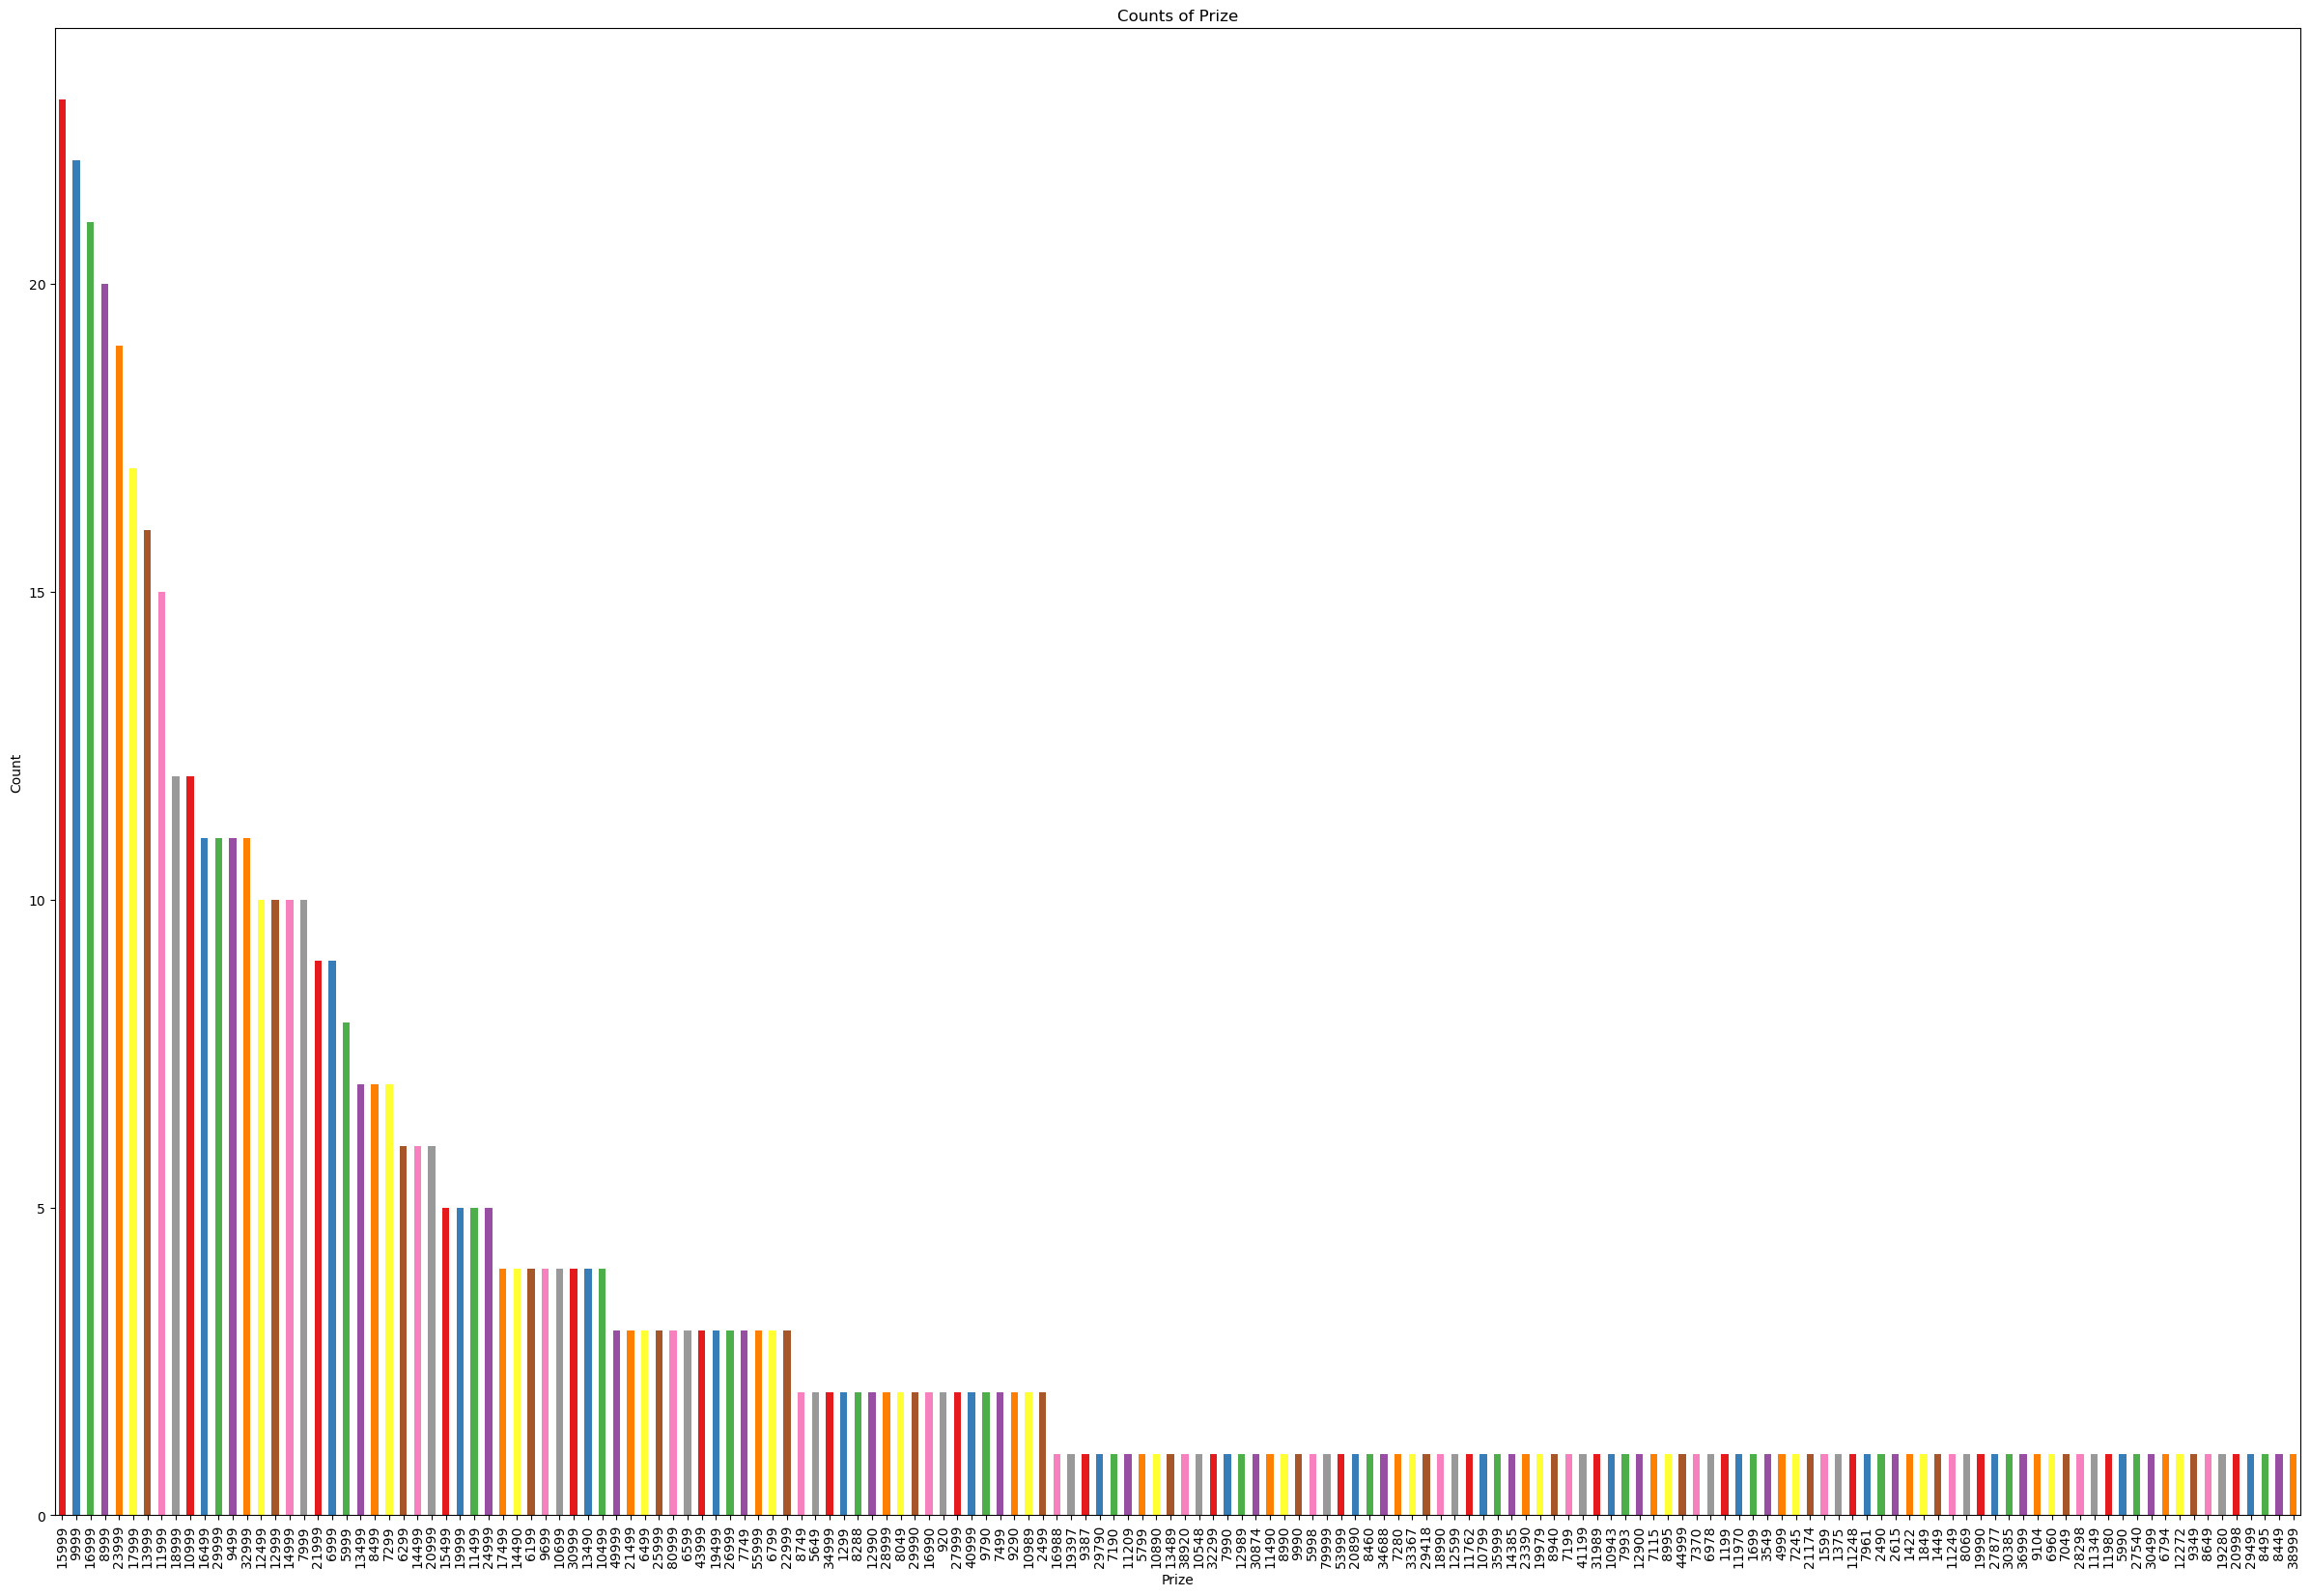

In [36]:
plt.figure(figsize=(30 ,20))
colors = sns.color_palette("Set1", len(df['Prize'].unique()))

# Plot the bar chart with the custom color palette
df['Prize'].value_counts().plot(kind='bar', color=colors)

plt.title('Counts of Prize')
plt.xlabel('Prize')
plt.ylabel('Count')
plt.show()

# CHECKING THE OUTLIERS AND TREATING THE COLUMN PRIZE

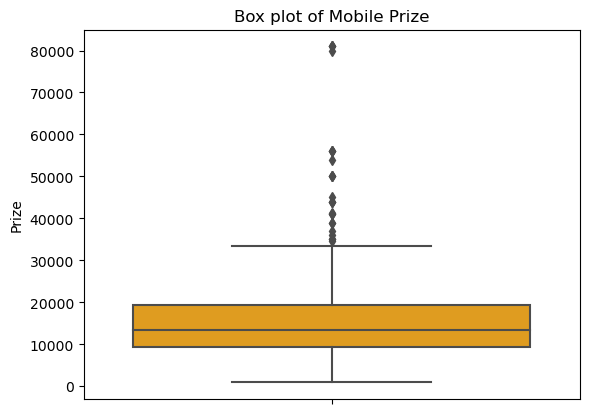

In [37]:
sns.boxplot(data=df,y='Prize',color = 'orange')
plt.title("Box plot of Mobile Prize")
plt.show()

In [38]:
Q1 = df['Prize'].quantile(0.01)
Q3  = df['Prize'].quantile(0.99)
df = df[(df['Prize'] > Q1) & (df['Prize'] < Q3)]

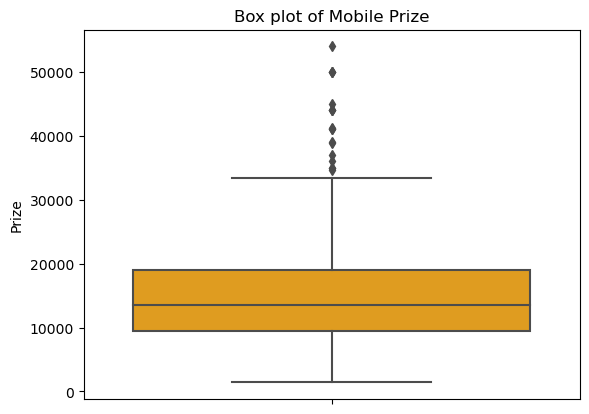

In [39]:
sns.boxplot(data=df,y='Prize',color = 'orange')
plt.title("Box plot of Mobile Prize")
plt.show()

In [40]:
df.shape

(528, 10)

# HISTOGRAM OF COLUMN Prize

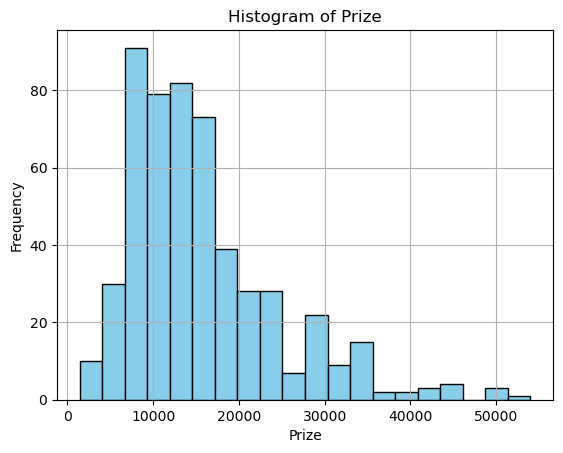

In [41]:
import matplotlib.pyplot as plt

plt.hist(df['Prize'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Prize')
plt.xlabel('Prize')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# KDE PLOT OF COLUMN PRIZE (Target variable)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13196\488735271.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Prize'], color='skyblue', shade=True)


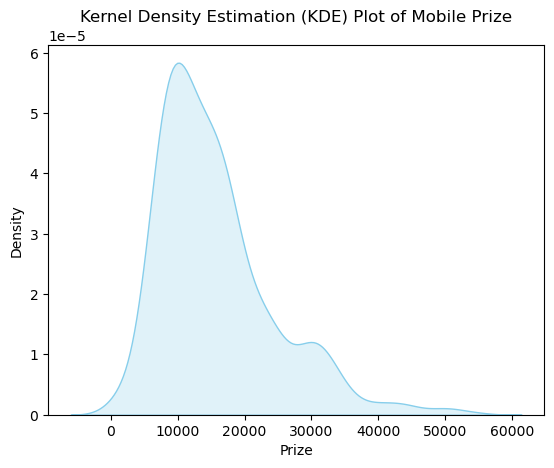

In [42]:
sns.kdeplot(df['Prize'], color='skyblue', shade=True)
plt.title('Kernel Density Estimation (KDE) Plot of Mobile Prize')
plt.xlabel('Prize')
plt.ylabel('Density')
plt.show()

# cdf plot of Prize (target variable)

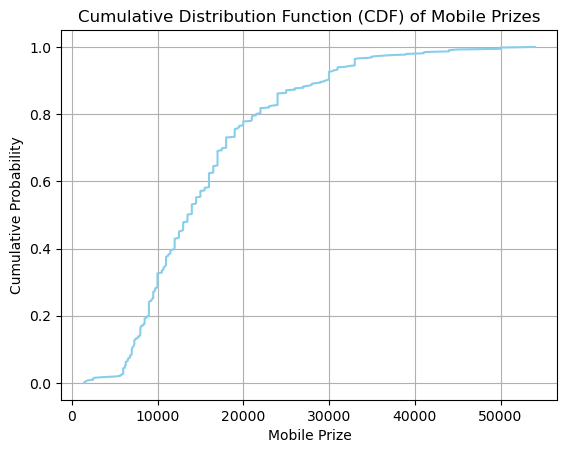

In [43]:
sorted_prices = np.sort(df['Prize'])

# Calculate the cumulative distribution function (CDF)
cumulative_prob = np.linspace(0, 1, len(sorted_prices))

# Plot the CDF
plt.plot(sorted_prices, cumulative_prob, color='skyblue')
plt.title('Cumulative Distribution Function (CDF) of Mobile Prizes')
plt.xlabel('Mobile Prize')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

# SEPARATING THE NUMERIC AND CATEGORICAL COLUMNS

In [44]:
numerical_cols = df.select_dtypes(include=["int64", "float64", "int32"]).columns
print("Total number of numerical features:", numerical_cols.shape[0])
print ("Numerical feature names:" , numerical_cols.tolist())

Total number of numerical features: 6
Numerical feature names: ['Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height', 'Prize']


In [45]:
categorical_cols = df.select_dtypes(include=["object"]).columns
print("Total number of categorical features:", categorical_cols.shape[0])
print ("Categorical feature names:" , categorical_cols.tolist())

Total number of categorical features: 4
Categorical feature names: ['Model', 'Colour', 'Dual Camera', 'Processor_']


# STATISTICAL DETAILS OF NUMERICAL COLUMNS USING DESCRIBE METHOD

In [46]:
df.describe()

,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,110.121212,5.386364,4920.833333,0.064394,16.564375,15684.746212
std,59.909993,1.980542,681.215823,0.245686,2.226234,8711.736428
min,16.000000,2.000000,800.000000,0.000000,4.500000,1422.000000
25%,64.000000,4.000000,5000.000000,0.000000,16.510000,9377.500000
50%,128.000000,6.000000,5000.000000,0.000000,16.710000,13499.000000
75%,128.000000,8.000000,5000.000000,0.000000,16.940000,18999.000000
max,256.000000,8.000000,7000.000000,1.000000,41.940000,53999.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 528 entries, 0 to 540
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          528 non-null    object 
 1   Colour         528 non-null    object 
 2   Memory         528 non-null    int64  
 3   RAM            528 non-null    int64  
 4   Battery_       528 non-null    int64  
 5   Dual Camera    528 non-null    object 
 6   AI Lens        528 non-null    int64  
 7   Mobile Height  528 non-null    float64
 8   Processor_     528 non-null    object 
 9   Prize          528 non-null    int32  
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 43.3+ KB


# Correlation matrix heatmap

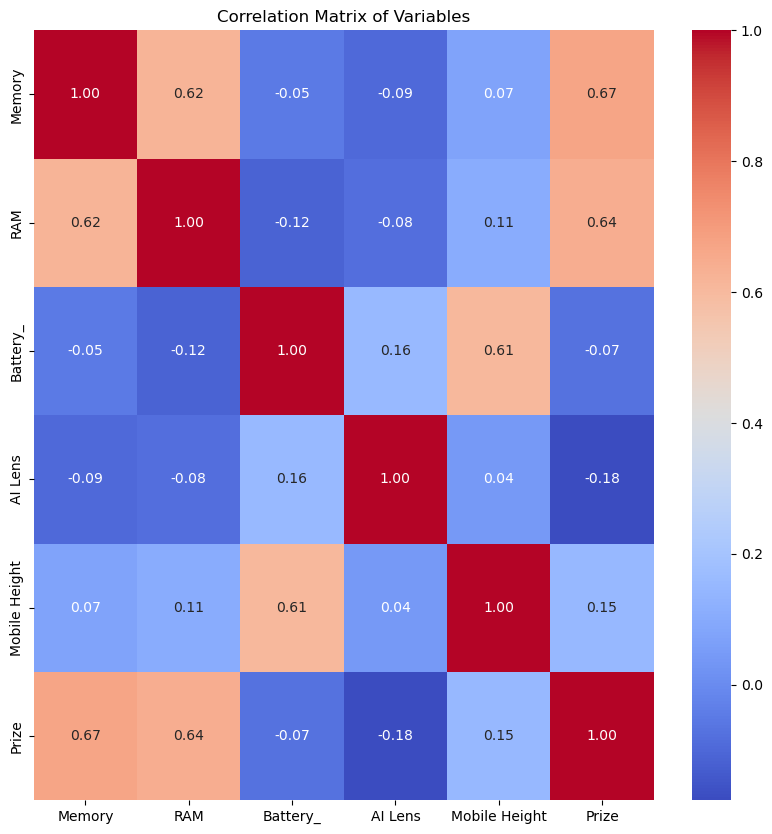

In [48]:
numerical_df = df[numerical_cols]

plt.figure(figsize=(10,10))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()

In [49]:
# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Filter correlation matrix with respect to 'Mobile Prize'
mobileprize_correlation = correlation_matrix['Prize'].sort_values(ascending=False)

# Display the correlation matrix with respect to 'SalePrice'
print(mobileprize_correlation)


Prize            1.000000
Memory           0.672100
RAM              0.644520
Mobile Height    0.153827
Battery_        -0.072502
AI Lens         -0.176526
Name: Prize, dtype: float64


# Heatmap of most correlated variables

Text(99.75, 0.5, 'Features')

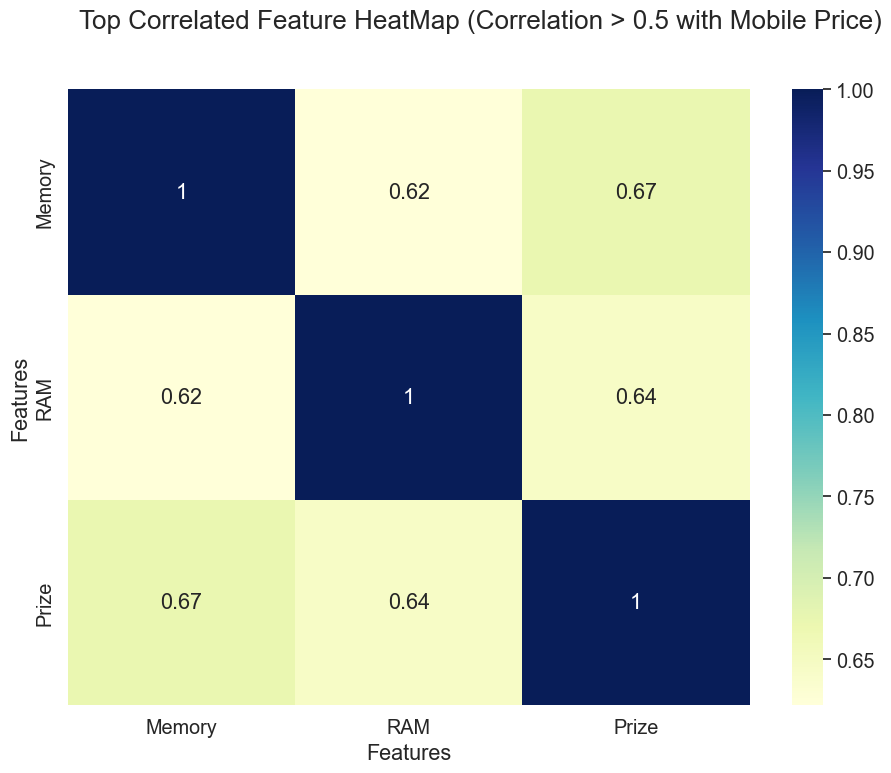

In [50]:
numerical_df = df[numerical_cols]

sns.set(font_scale = 1.3)
plt.figure(figsize = (11,8))

top_corr = correlation_matrix.index[abs(correlation_matrix["Prize"])>0.5]
g = sns.heatmap(numerical_df[top_corr].corr(),annot=True,cmap="YlGnBu")
plt.suptitle("Top Correlated Feature HeatMap (Correlation > 0.5 with Mobile Price)")
plt.xlabel("Features")
plt.ylabel("Features")

# Pairplot for selected variables

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


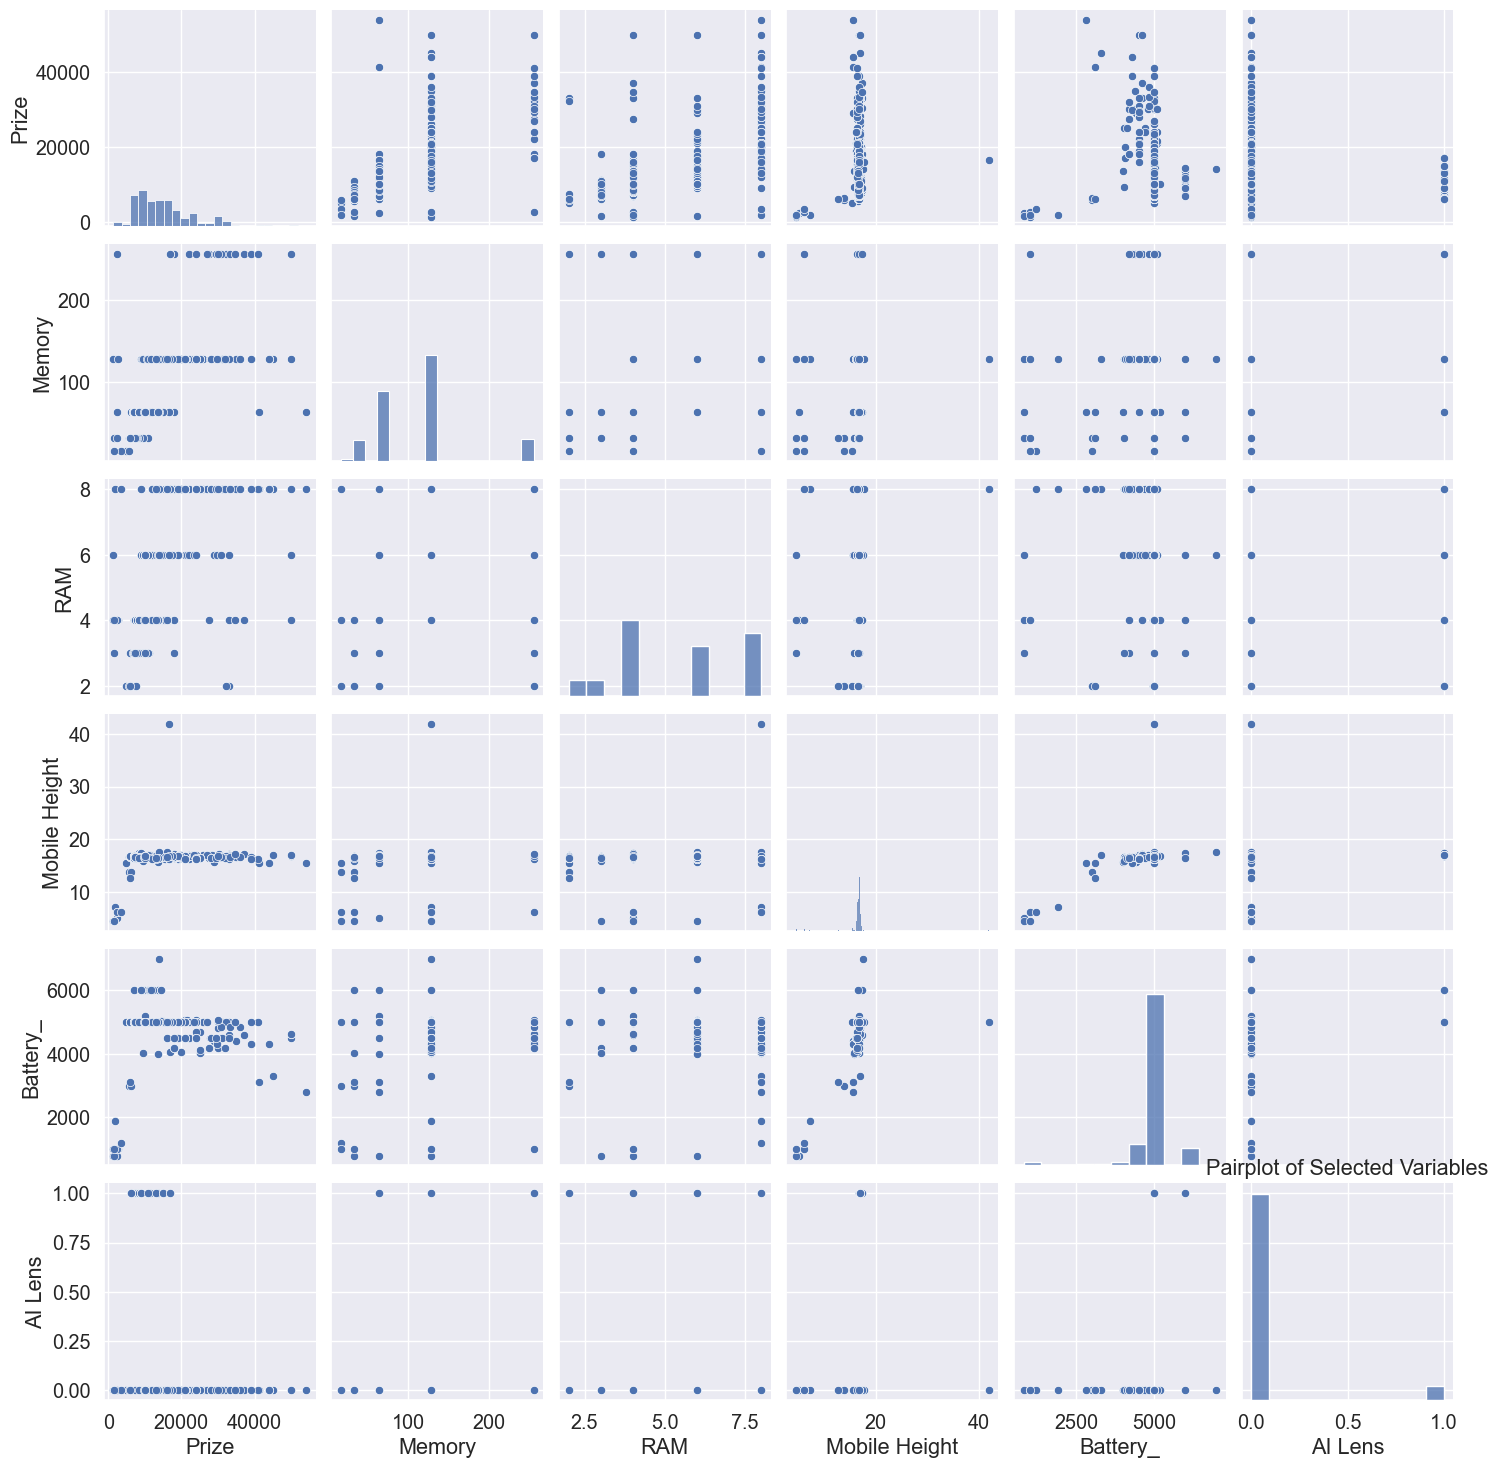

In [51]:
selected_columns = ['Prize', 'Memory', "RAM", "Mobile Height", 'Battery_', "AI Lens"]
sns.pairplot(df[selected_columns])
plt.title('Pairplot of Selected Variables')
plt.show()

# scatterplots between the most correlated variables

<Axes: xlabel='RAM', ylabel='Prize'>

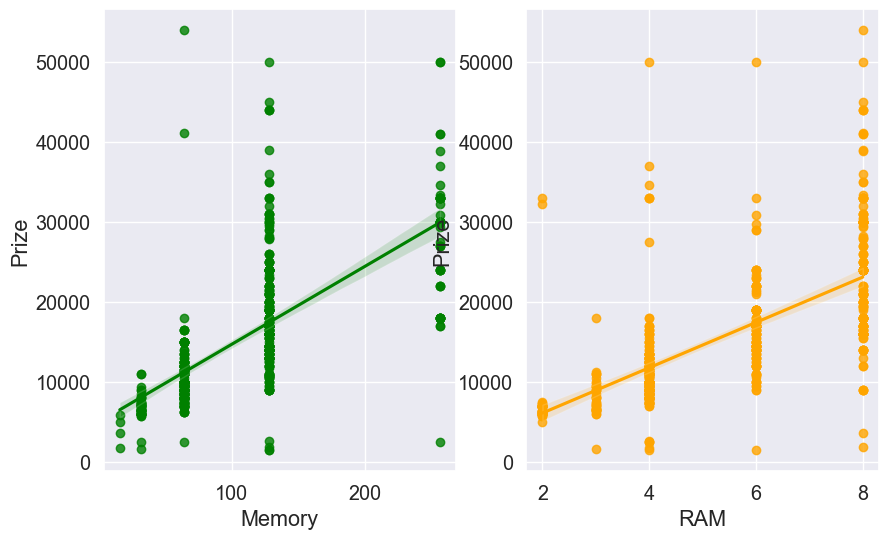

In [52]:
fig,((ax1,ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

sns.regplot(x="Memory", y="Prize", data=df, scatter=True, fit_reg=True, color = 'Green', ax=ax1)

sns.regplot(x="RAM", y="Prize", data=df, scatter=True, fit_reg=True,color = 'orange', ax=ax2)

# PieChart for distribution of AI Lens

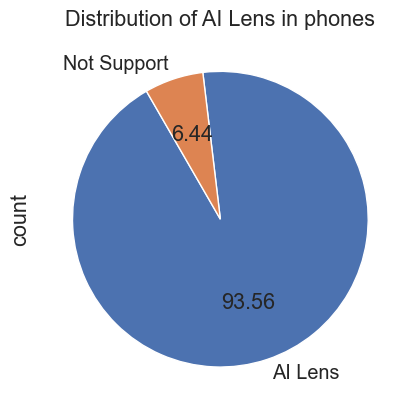

In [53]:
plt.title('Distribution of AI Lens in phones')
df['AI Lens'].value_counts().plot(kind='pie',autopct='%.2f',labels=['AI Lens','Not Support'],startangle=120)
plt.show()

# Feature vs. Target

# Swarm Plot for 'Memory' and 'PropPrice' with hue as 'RAM'

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:orange'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\categorical.py:

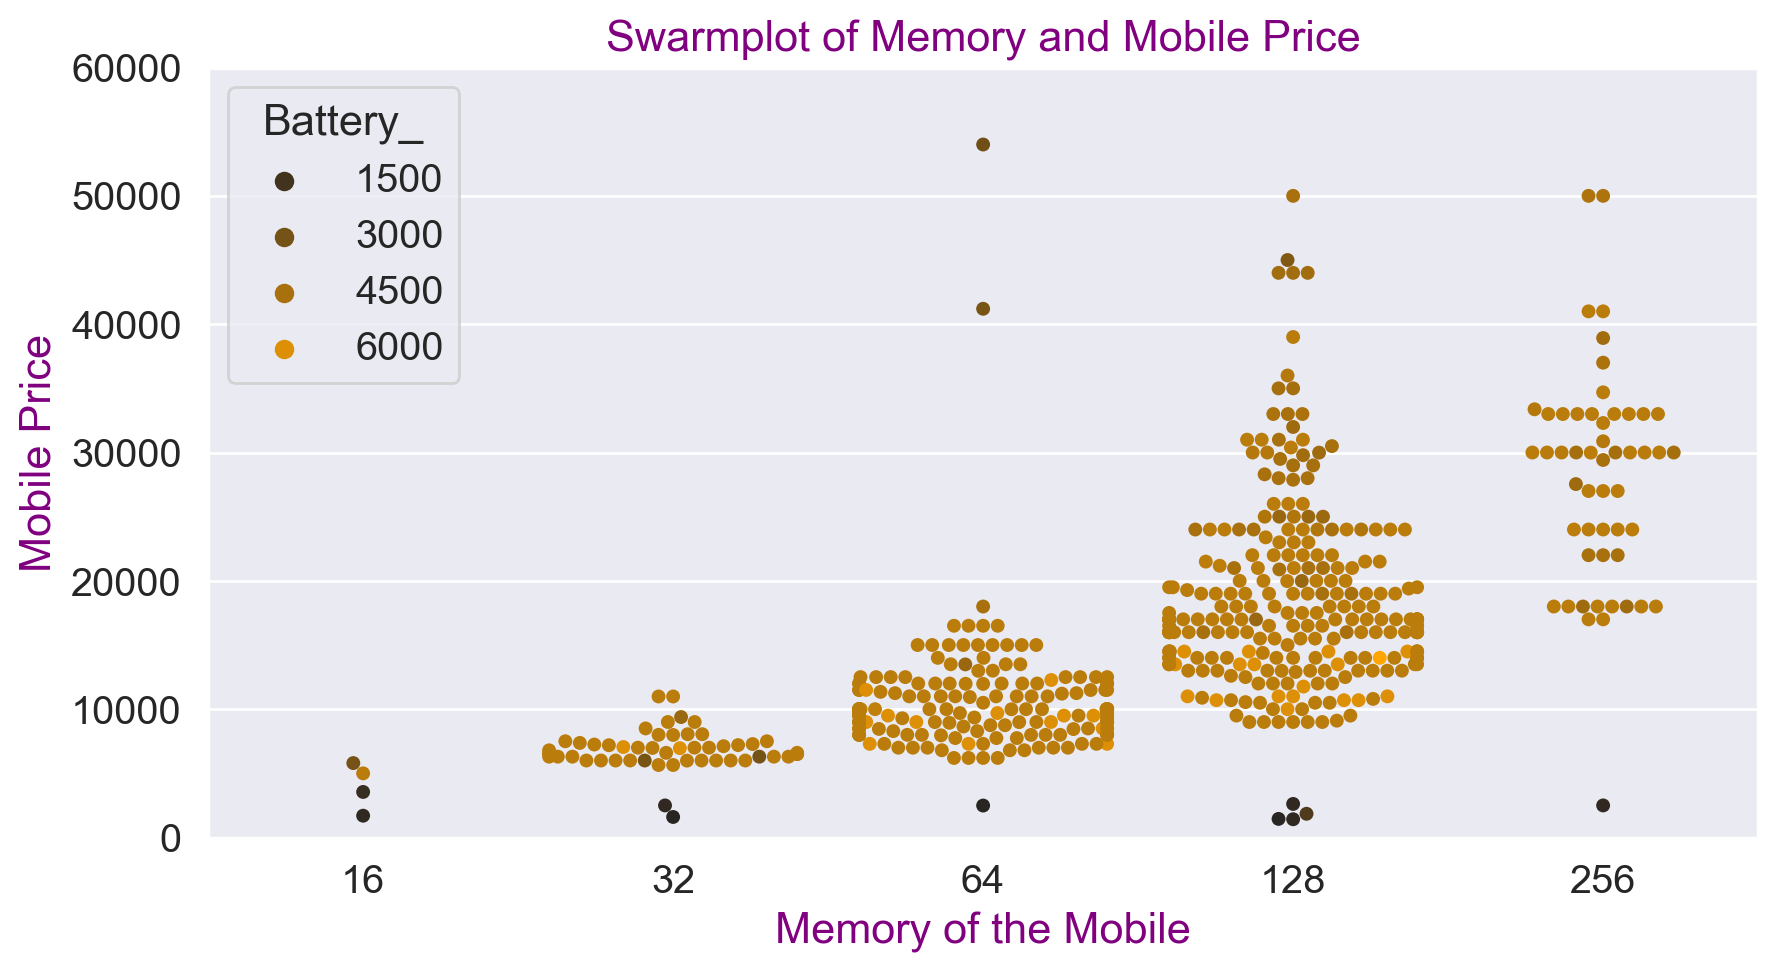

In [54]:
plt.figure(figsize = (10,5), dpi = 200)
sns.swarmplot(x = 'Memory', y = 'Prize', data =df, hue = 'Battery_',color='orange')
plt.xlabel('Memory of the Mobile', color = 'purple')
plt.ylabel('Mobile Price', color = 'purple')
plt.ylim(0,60000)
plt.title('Swarmplot of Memory and Mobile Price', color = 'purple')
plt.show()

# Feature vs. Feature

# Kde Plot for 'Memory' as Feature and 'Battery_' as other Feature with hue as 'RAM'

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13196\2133334835.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = 'Memory', y = 'Battery_', data = df,hue = 'RAM', levels = 5, color = 'brown', linewidths = 5,
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: linewidths is ignored by contourf
  cset = contour_func(


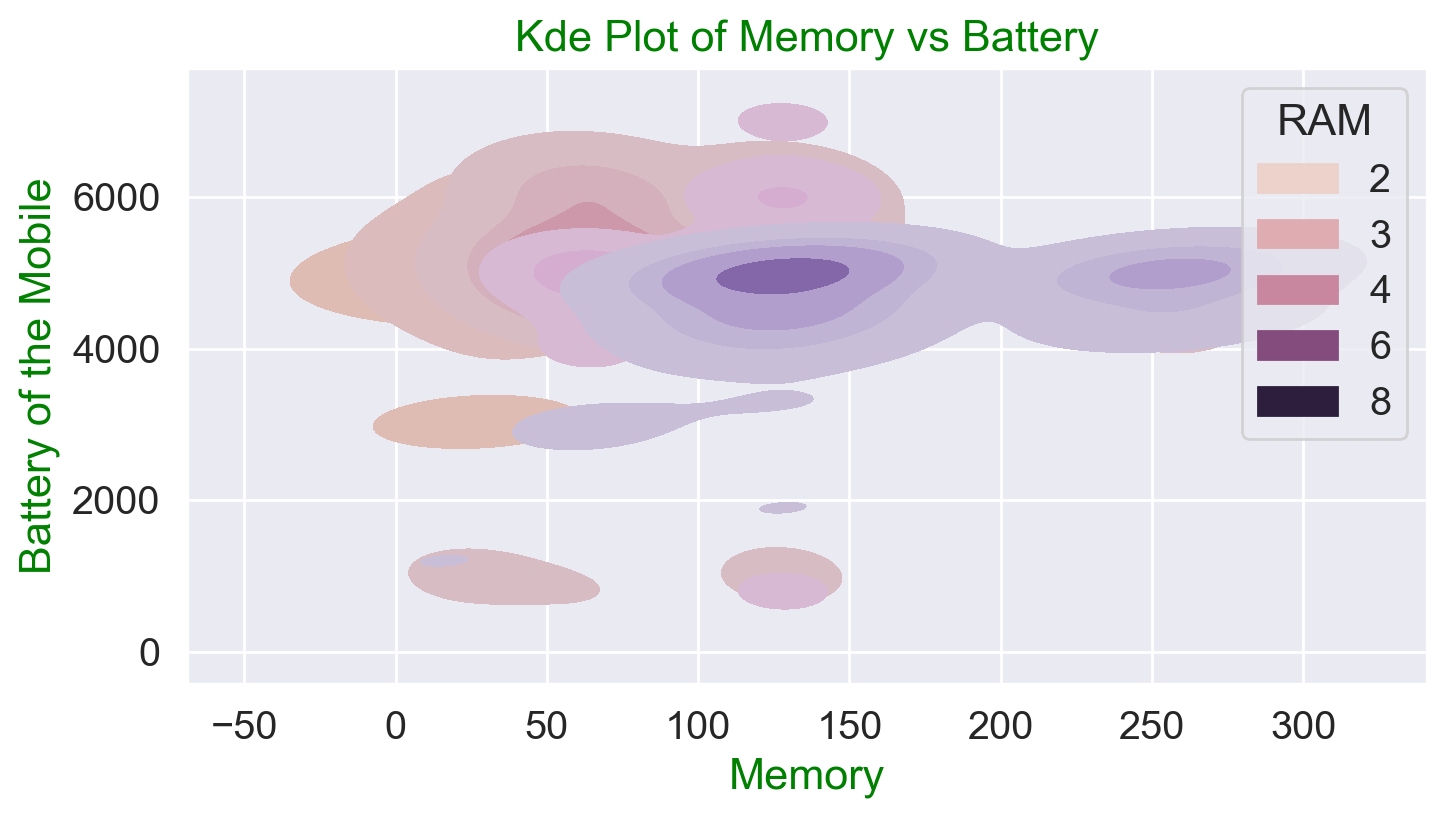

In [55]:
plt.figure(figsize = (8,4), dpi = 200)
sns.kdeplot(x = 'Memory', y = 'Battery_', data = df,hue = 'RAM', levels = 5, color = 'brown', linewidths = 5,
            shade = True)
plt.xlabel('Memory', color = 'green')
plt.ylabel('Battery of the Mobile', color = 'green')
plt.title('Kde Plot of Memory vs Battery', color = 'green')
plt.show()

# Applying Label Encoding to the columns whose variables are not in order

We ll apply Label Encoding instead of Nominal Encoding because Nominal encoding will create new binary columns for each category in the specified columns

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
label_encoder = LabelEncoder()

In [58]:
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [59]:
df.shape

(528, 10)

In [60]:
df.head()

,Model,Colour,Memory,RAM,Battery_,Dual Camera,AI Lens,Mobile Height,Processor_,Prize
0,21,156,64,4,6000,26,1,16.76,107,7299
1,21,20,64,4,6000,26,1,16.76,107,7299
2,35,146,128,8,5000,13,0,16.64,71,11999
3,67,196,32,2,5000,28,0,16.56,53,5649
4,10,128,128,8,5000,27,1,16.76,13,8999


# SCALING AND PCA

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [62]:
# Assuming df is your DataFrame and you have a target variable named 'target'
x = df.drop(columns=['Prize'])  # Features
y = df['Prize']  # Target variable

In [63]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [64]:
pca = PCA(n_components=3)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

rfr = RandomForestRegressor()
rfr.fit(x_train_pca, y_train)

RandomForestRegressor()

In [65]:
accuracy = rfr.score(x_test_pca, y_test)
accuracy

0.7070981571605681

# It shows that PCA is not required as the data has only few number of variables 

# Feature selection

In [66]:
x = df.drop('Prize', axis = 1)
y= df.Prize

# Train Test data

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Linear Regression

# Create and train the model

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

In [69]:
linearmodel = LinearRegression()

In [70]:
linearmodel.fit(x_train,y_train)

LinearRegression()

In [71]:
accuracy_linearmodel = linearmodel.score(x_test, y_test)
print("Accuracy (R^2 score) of Linear Regression Model is:", accuracy_linearmodel)

Accuracy (R^2 score) of Linear Regression Model is: 0.44197408465581933


# The accuracy score of the Linear Regression Model is too less

# DECISION TREE REGRESSOR

In [72]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
# Initialize DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree_reg.fit(x_train, y_train)


DecisionTreeRegressor(random_state=42)

In [74]:
accuracy_tree_reg = tree_reg.score(x_test, y_test)
print("Accuracy (R^2 score) of the DecisionTree Regressor Model is:", accuracy_tree_reg)

Accuracy (R^2 score) of the DecisionTree Regressor Model is: 0.850151091121106


# The accuracy score of the DecisionTree Regression Model is 85%.  Let us try the other models too.

# ADABOOST REGRESSOR

In [75]:
from sklearn.ensemble import AdaBoostRegressor

In [76]:
# Initialize AdaBoostRegressor
adaboost_reg = AdaBoostRegressor(random_state=42)

# Fit the model on the training data
adaboost_reg.fit(x_train, y_train)


AdaBoostRegressor(random_state=42)

In [77]:
accuracy_adaboost_reg = adaboost_reg.score(x_test, y_test)
print("Accuracy (R^2 score) of AdaBoost Regressor Model is:", accuracy_adaboost_reg)

Accuracy (R^2 score) of AdaBoost Regressor Model is: 0.6827536552943256


# The accuracy of AdaBoost Regressor model is 68% which is less than the DecisionTree Model.

# XGBOOST REGRESSOR

In [78]:
xgb = XGBRegressor()

In [79]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [80]:
accuracy_xgb = xgb.score(x_test, y_test)
print("Accuracy (R^2 score) of XGBoost Regressor Model is:", accuracy_xgb)

Accuracy (R^2 score) of XGBoost Regressor Model is: 0.8986565353168832


# Score comes out to be almost 90%. so XGBOOSTER is the best algorithm for this model

# Measuring other Metrics like Mean absolute Error and Root mean squared error through xgboost

In [81]:
xgb_pred = xgb.predict(x_test)

In [82]:
mae_xgb = mean_absolute_error(y_test, xgb_pred)
print(f"Mean Absolute Error (MAE) of XGBoost Regressor Model is: {mae_xgb}")

rmse_xgb = mean_squared_error(y_test, xgb_pred, squared=False)
print(f"Root Mean Squared Error (RMSE) of XGBoost Regressor Model is: {rmse_xgb}")

Mean Absolute Error (MAE) of XGBoost Regressor Model is: 1118.8756391417305
Root Mean Squared Error (RMSE) of XGBoost Regressor Model is: 2375.7918766934563


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# CALCULATING FEATURE IMPORTANCE THROUGH XGBOOST MODEL

In [83]:
xgb.feature_importances_

array([3.4257278e-02, 1.1625574e-02, 3.7137812e-01, 1.1096511e-01,
       3.3030602e-01, 6.1481331e-02, 2.5818637e-04, 3.3518769e-02,
       4.6209596e-02], dtype=float32)

# CREATING A DATAFRAME WITH VARIABLES AND CORRESPONDING FEATURE IMPORTANCES

In [84]:
pd.DataFrame(index = x.columns, data = xgb.feature_importances_,
             columns = ['Feature Importance']).sort_values('Feature Importance', ascending = False)[:10]

,Feature Importance
Memory,0.371378
Battery_,0.330306
RAM,0.110965
Dual Camera,0.061481
Processor_,0.046210
Model,0.034257
Mobile Height,0.033519
Colour,0.011626
AI Lens,0.000258


# Memory is the most effective feature followed by Battery_ and RAM

# Model loading and final testing

In [85]:
final_model = XGBRegressor()

In [86]:
final_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [87]:
from joblib import dump, load

In [88]:
dump(final_model, 'final_prize_model.joblib')

['final_prize_model.joblib']

In [89]:
loaded_model = load('final_prize_model.joblib')

# Putting some values in all the features for testing purpose and calculating the Price¶

In [90]:
input_features = x.head(5)

In [91]:
predicted_prize = loaded_model.predict(input_features).round(decimals=0)
predicted_prize

array([ 7232.,  7280., 13193.,  6336.,  8984.], dtype=float32)

In [92]:
actual_prize = y.head(5)
actual_prize

0     7299
1     7299
2    11999
3     5649
4     8999
Name: Prize, dtype: int32

# CREATING A DATAFRAME OF ACTUAL AND PREDICTED PRICES

In [93]:
pd.DataFrame({'actual_price': actual_prize, 'Predicted_price': predicted_prize})

,actual_price,Predicted_price
0,7299,7232.0
1,7299,7280.0
2,11999,13193.0
3,5649,6336.0
4,8999,8984.0


# This is giving almost 90% results

# POINT PLOT FOR ACTUAL VERSUS PREDICTED

Text(0.5, 1.0, 'PointPlot for Actual and Predicted price')

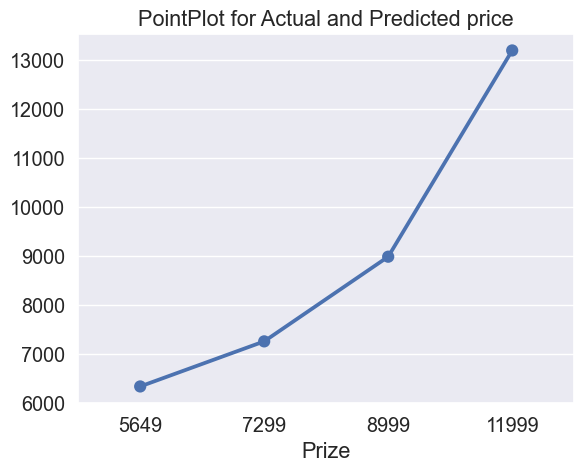

In [94]:
sns.pointplot(x=actual_prize, y = predicted_prize)
plt.title('PointPlot for Actual and Predicted price')

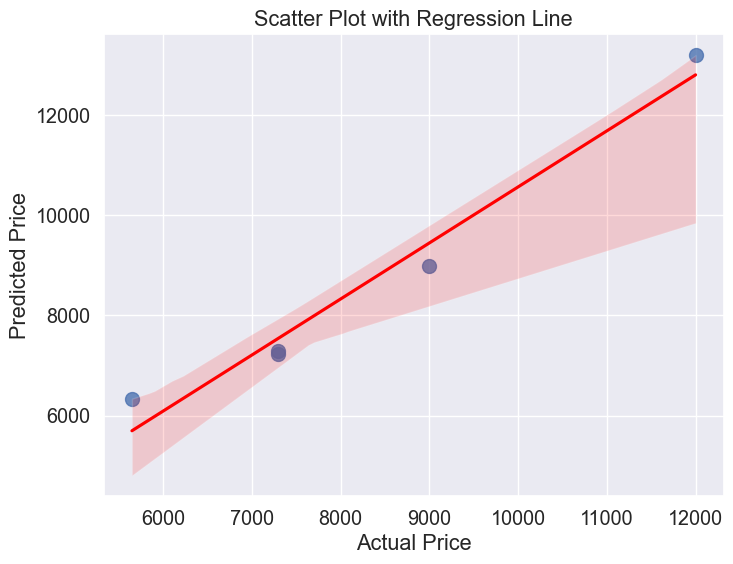

In [95]:
# Create scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=actual_prize, y=predicted_prize, scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

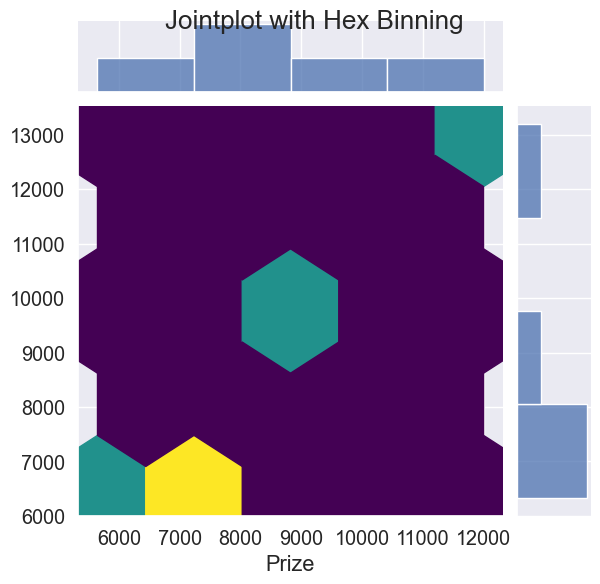

In [96]:
sns.jointplot(x=actual_prize, y=predicted_prize, kind='hex', cmap='viridis')
plt.suptitle('Jointplot with Hex Binning')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13196\411954943.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(actual_prize, label='Actual Price', shade=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13196\411954943.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(predicted_prize, label='Predicted Price', shade=True)


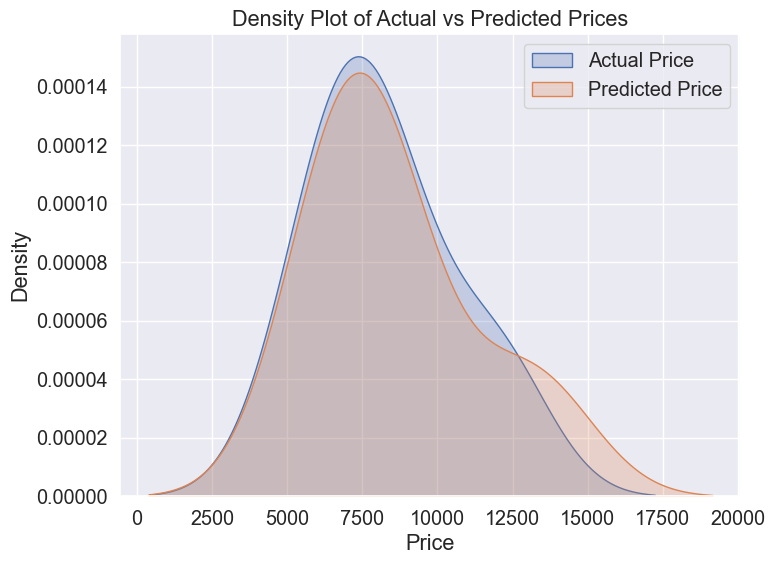

In [100]:
plt.figure(figsize=(8, 6))
sns.kdeplot(actual_prize, label='Actual Price', shade=True)
sns.kdeplot(predicted_prize, label='Predicted Price', shade=True)
plt.title('Density Plot of Actual vs Predicted Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

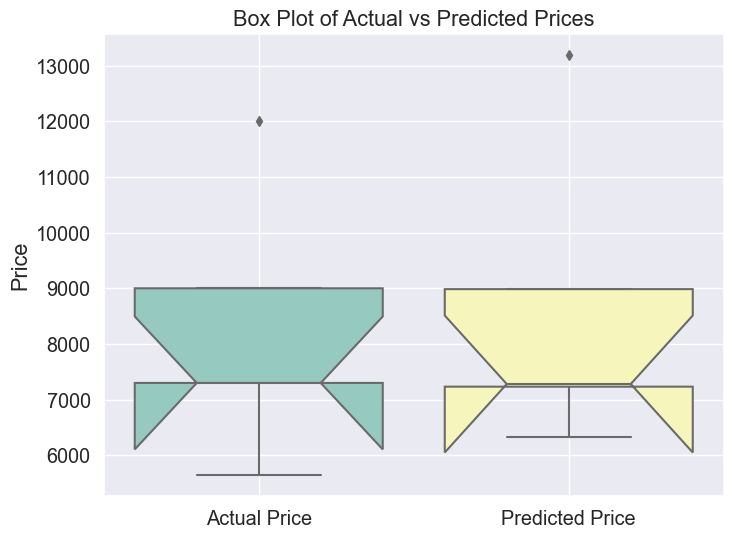

In [101]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=[actual_prize, predicted_prize], notch=True, palette='Set3')
plt.title('Box Plot of Actual vs Predicted Prices')
plt.xticks([0, 1], ['Actual Price', 'Predicted Price'])
plt.ylabel('Price')
plt.grid(True)
plt.show()


# CALCULATING THE MAE, RMSE AND R2 SCORE OF THE ACTUAL AND PREDICTED PRICES

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

actual_price = [7299, 7299, 11999, 5649, 8999]
predicted_price = [7232.0, 7280.0, 13193, 6336.0, 8984.0]

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_price, predicted_price)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(actual_price, predicted_price, squared=False)

r2 = r2_score(actual_price, predicted_price)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 score is: {r2}")

Mean Absolute Error (MAE): 396.4
Root Mean Squared Error (RMSE): 616.8760005057743
R2 score is: 0.917952565761104


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Conclusion:  
    
Based on these metrics:

1.  The model performs well in predicting mobile phone prices, as indicated by the high R2 score.

2.  The MAE and RMSE, while not negligible, are reasonable for predicting prices depending on the price range and context of the mobile phones involved.

# FINAL CONCLUSION

Based on the feature importance values provided for mobile price prediction, here’s a conclusion you can draw:

1. MEMORY: Memory capacity (likely referring to internal storage) is the most influential feature for predicting mobile phone prices. Phones with higher storage capacities generally command higher prices.

2. BATTERY:  Battery capacity or battery life is the second most important feature. This suggests that phones with longer battery life or larger battery capacities tend to have higher prices.

3. RAM:  Random Access Memory (RAM) plays a moderately important role in price prediction. Higher RAM allows for smoother multitasking and better performance.

4. DUAL CAMERA:  Having a dual camera setup is also a notable factor but less influential compared to memory, battery, and RAM.

5. PROCESSOR:  The type or performance of the processor is moderately influential. 

6. MODEL:  The specific model or brand of the phone has some impact on price prediction. 

7. MOBILE HEIGHT:  Mobile phone dimensions (likely referring to physical size or design aspects) contribute marginally to price prediction.

8. COLOR:  The color of the phone has minimal impact on pricing compared to other technical specifications. However, certain colors or finishes may appeal more to specific consumer demographics, influencing pricing to a small extent.

9. AI LENS:  The presence of AI lens features has negligible impact on price prediction. This suggests that while AI technology is a trending feature, its direct influence on pricing may be minimal compared to other hardware specifications.